## Exercice 1 Wine database

Nous allons utiliser la base de données «Wine Data Set » disponible sur le dépôt de
bases de donnes maintenu par l’Université de Californie à Irvine (UCI). Le lien direct
est celui-ci : http://archive.ics.uci.edu/ml/datasets/Wine?Quality

In [1]:
import pandas as pd
import matplotlib as mp
import numpy as np
mp.rcParams.update({"figure.max_open_warning": 0}) #pour éviter un warning à la génération des scatter plots
import matplotlib.pyplot as plt
from math import sqrt
from mlxtend.plotting import plot_confusion_matrix

# Variables globales
lab = (1, 2, 3)
fontsize = 16
figsize = (14,8)
edge = "black"
color= "dodgerblue"

### 1.1) Créez un notebook pour lire la base de données et générez un dataframe

In [2]:
cols = ["Class", "Alcohol", "Malic acid","Ash","Alcalinity of ash","Magnesium","Total phenols","Flavanoids","Nonflavanoid phenols","Proanthocyanins","Color intensity","Hue","OD280/OD315 of diluted wines","Proline"]
wine_df = pd.read_csv("wine.data", sep=",", names=cols) #note: wine.data must be in the same folder than this notebook
wine_df2 = wine_df.copy()

### 1.2) Se familiariser avec la base de données (p.ex., nombre d’observations, des classes, d’attributs, statistiques des attributs, données manquantes).

In [3]:
wine_df

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


#### 1.2.1) Analyse de contenu de la base de données

In [4]:
dataNb = len(wine_df.index)
print("Nombre de d'objets dans le dataset (lignes) : ", dataNb)
cols = list(wine_df)

print("Nombre d'attributs (colonnes) dans le dataset: ", len(cols))
print("Logiquement nous devrions avoir", len(cols), " * ", dataNb, " éléments = ", len(cols) * dataNb)
print("Nombre actuel d'éléments: ", wine_df.size)
print ("On peut en conclure qu'il n'y a as de données manquantes")

Nombre de d'objets dans le dataset (lignes) :  178
Nombre d'attributs (colonnes) dans le dataset:  14
Logiquement nous devrions avoir 14  *  178  éléments =  2492
Nombre actuel d'éléments:  2492
On peut en conclure qu'il n'y a as de données manquantes


### 1.3) Analyse exploratoire

#### 1.3.1) Création des scatter plots

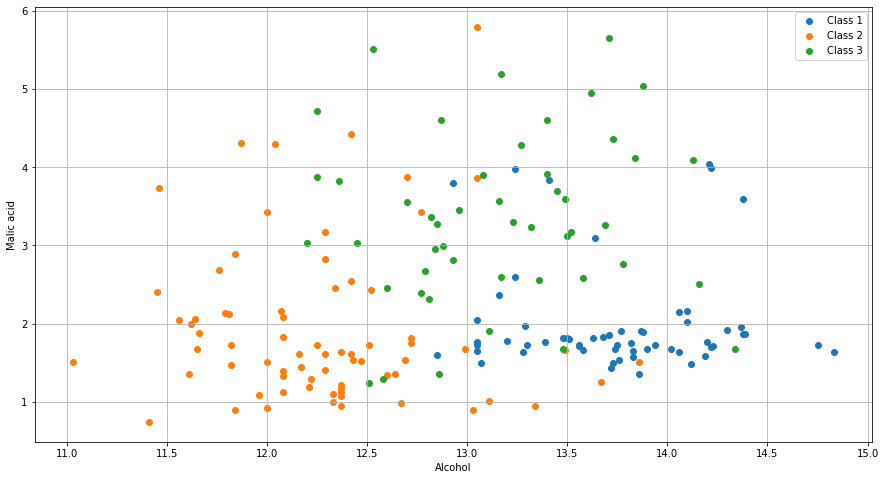

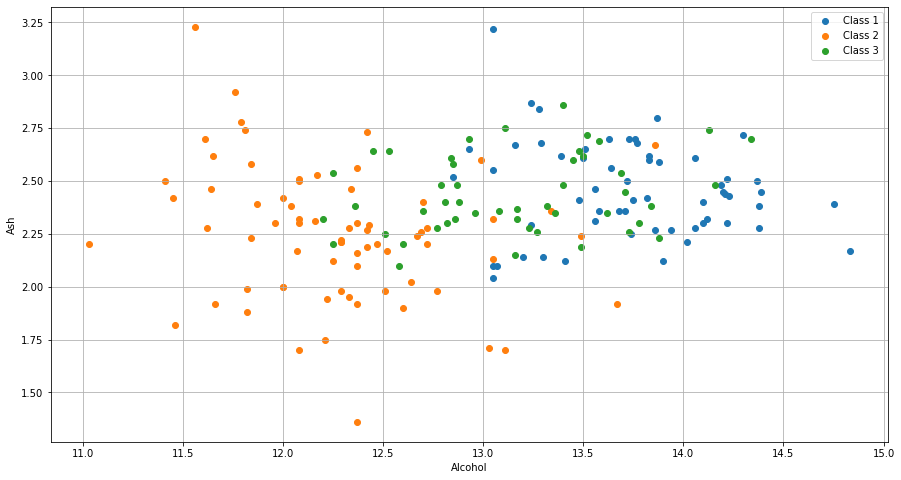

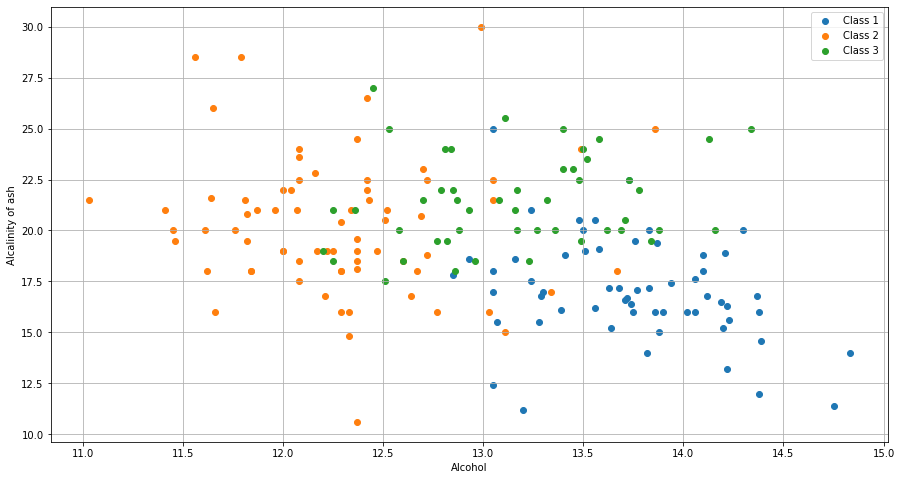

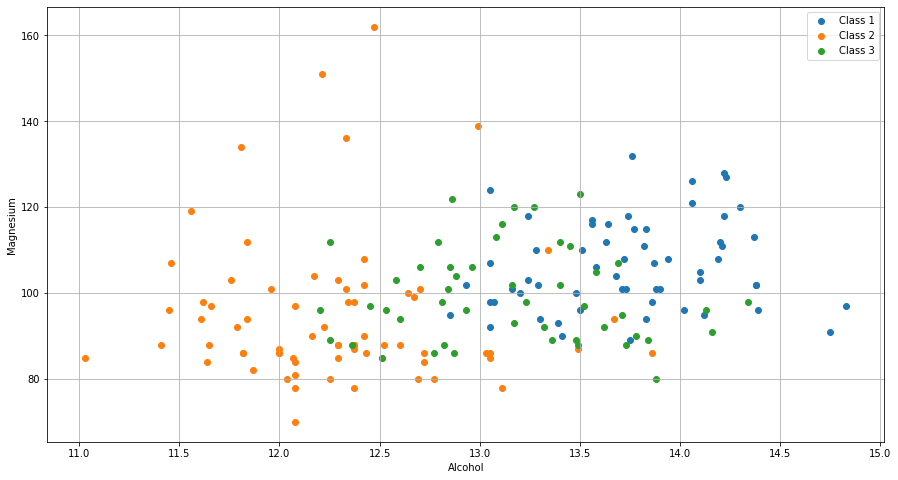

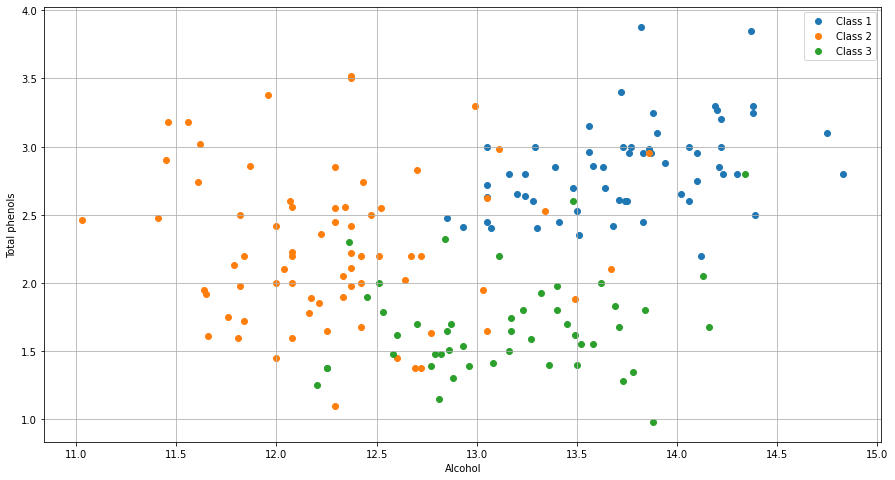

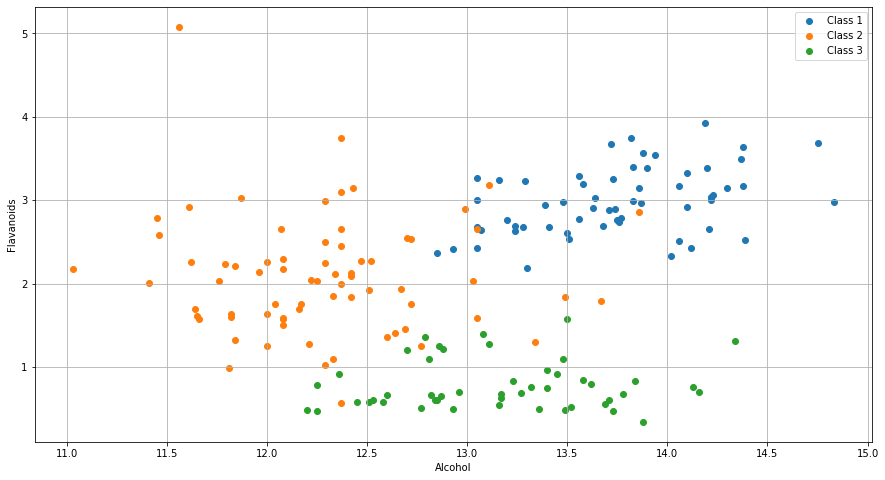

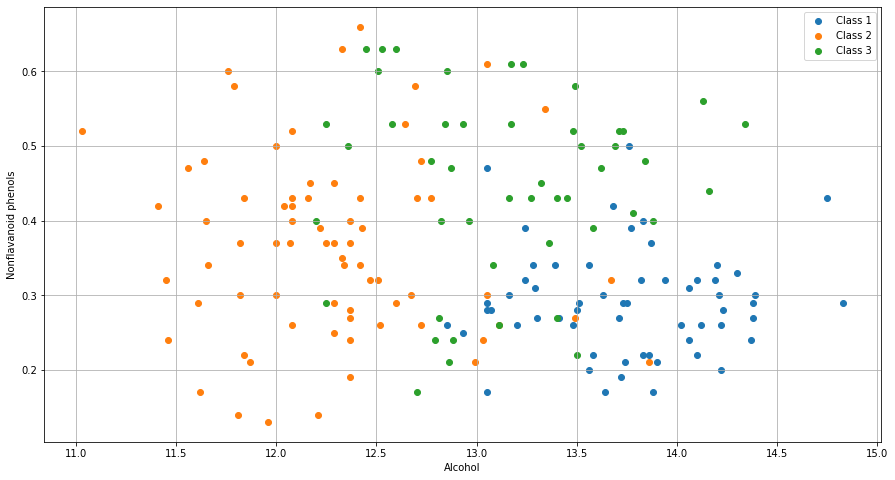

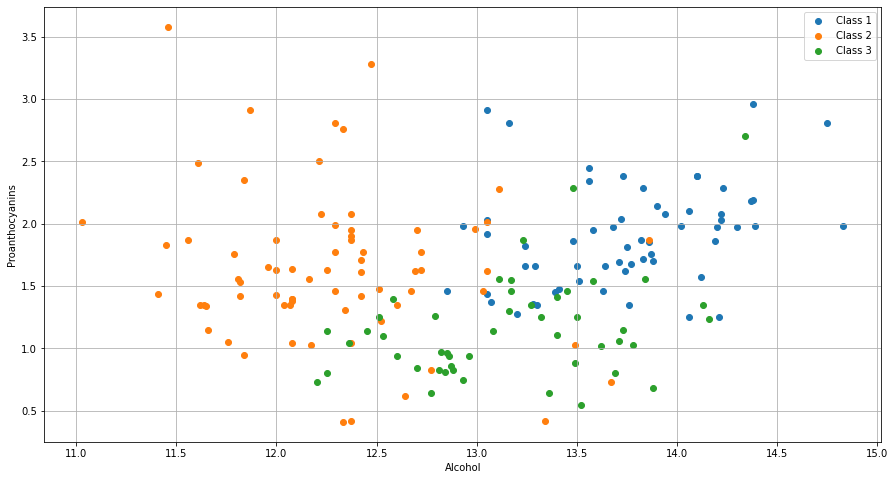

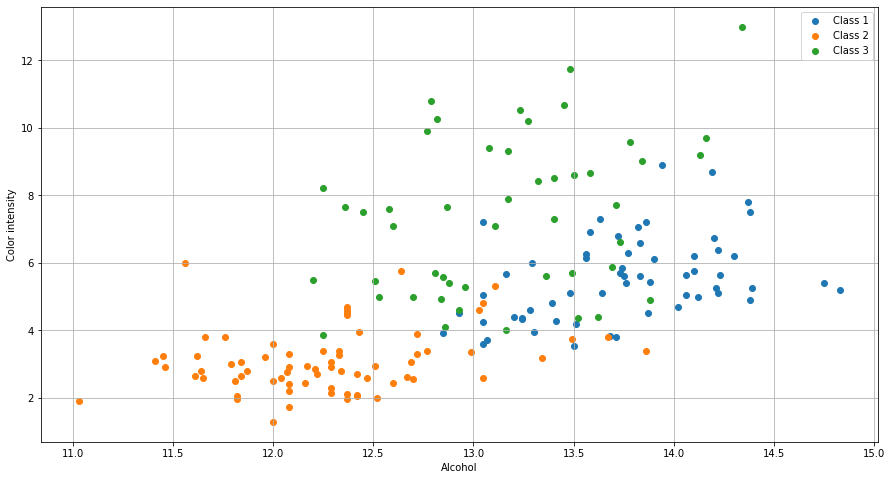

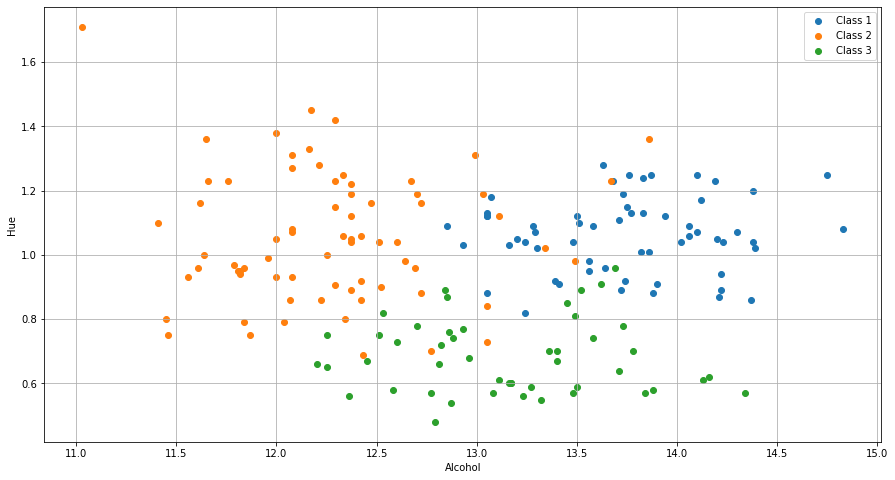

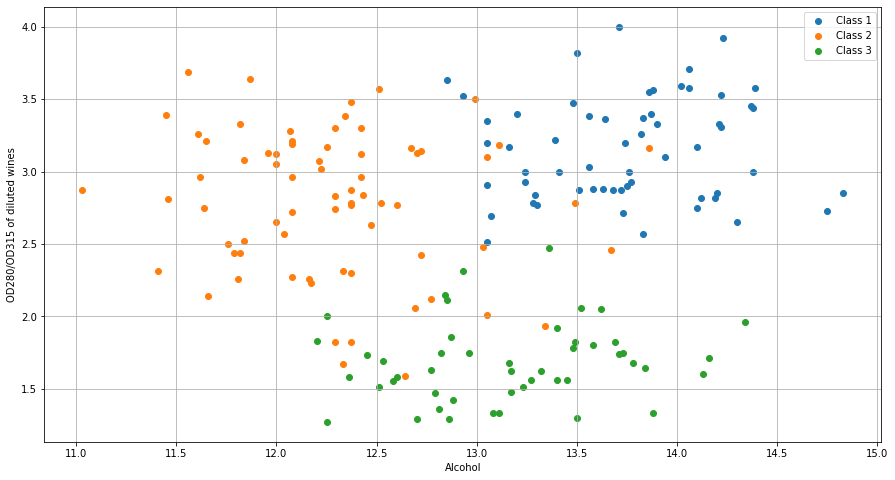

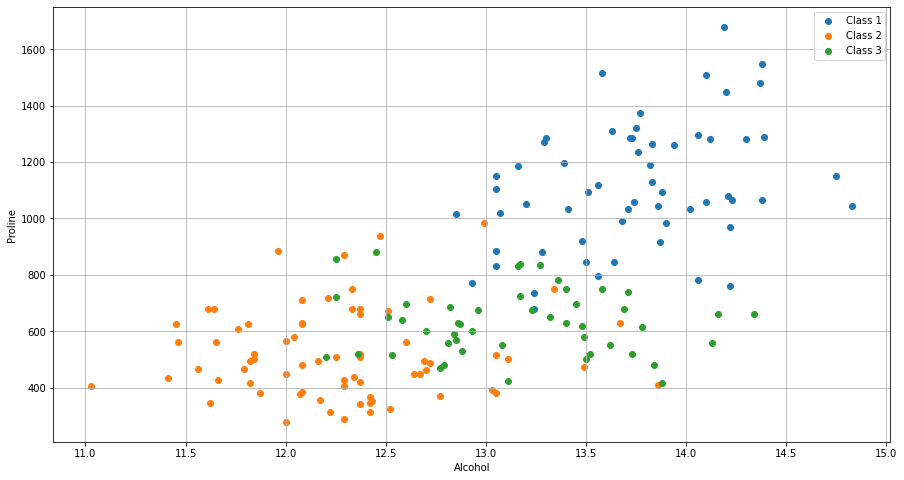

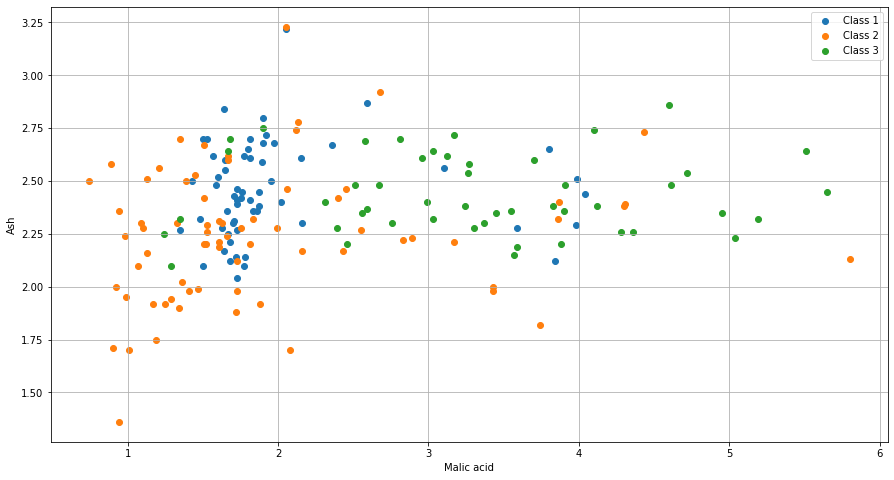

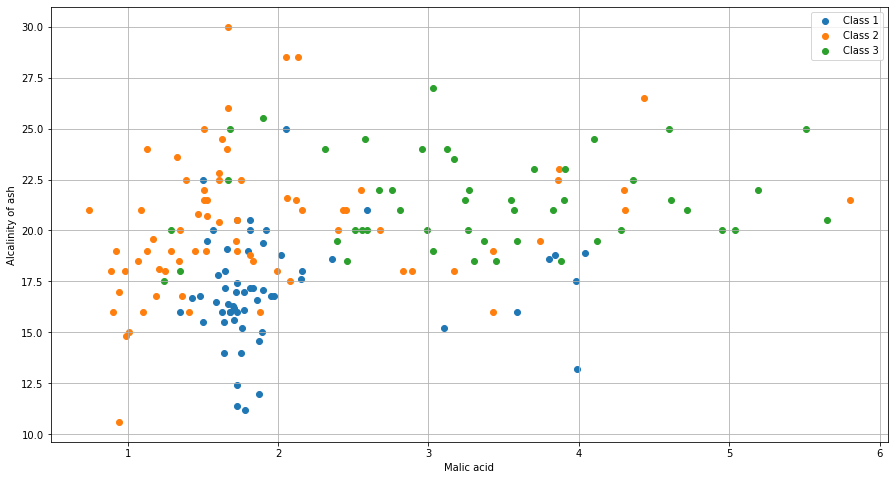

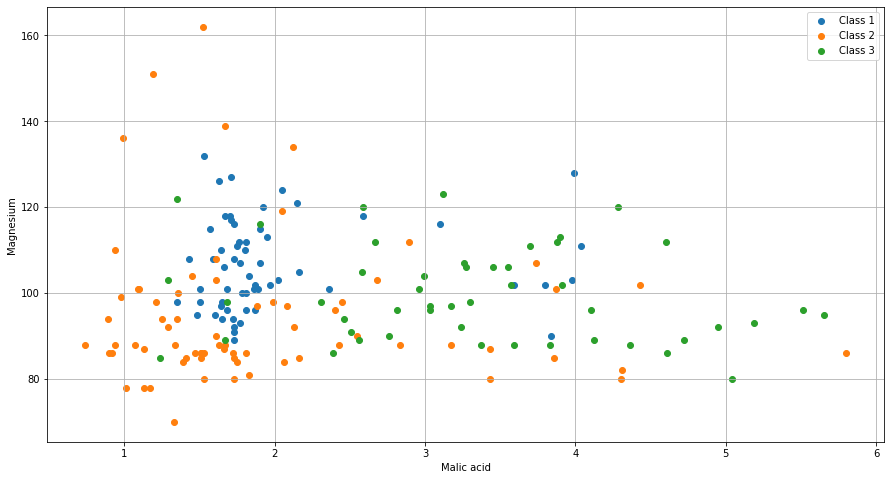

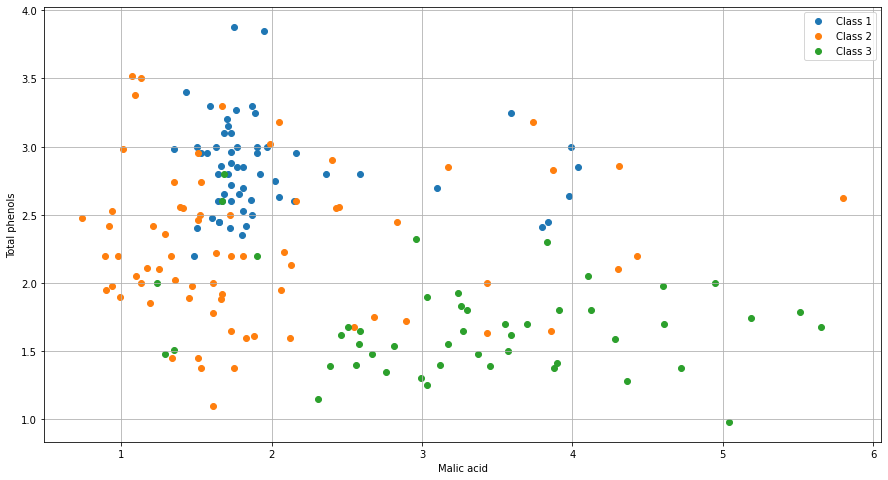

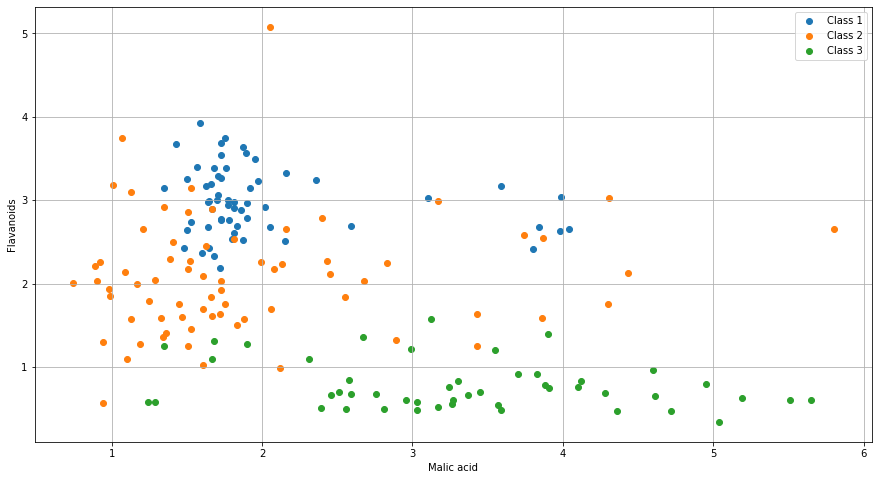

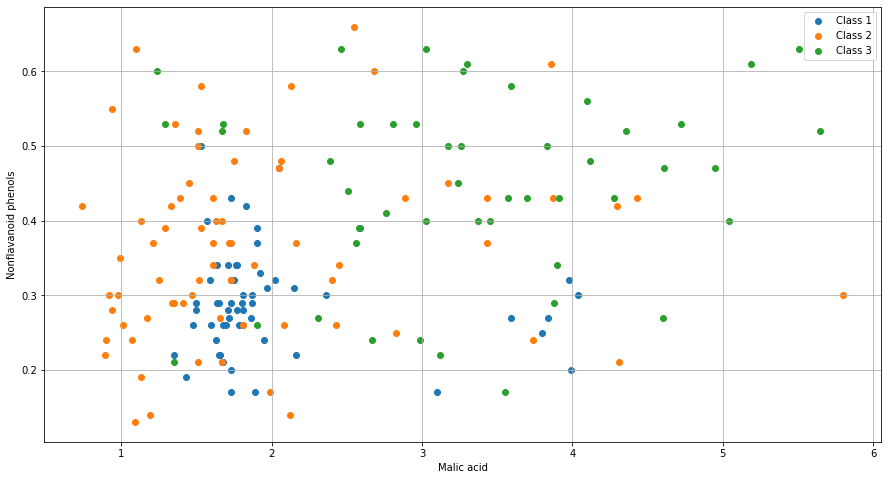

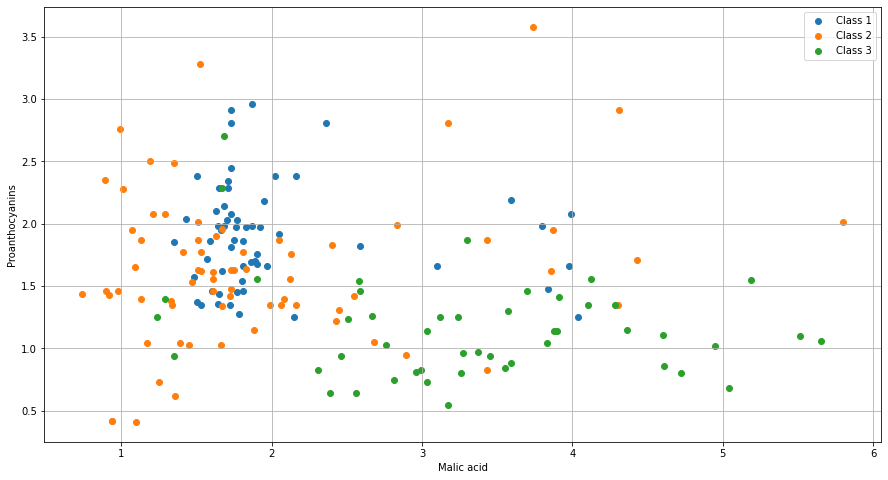

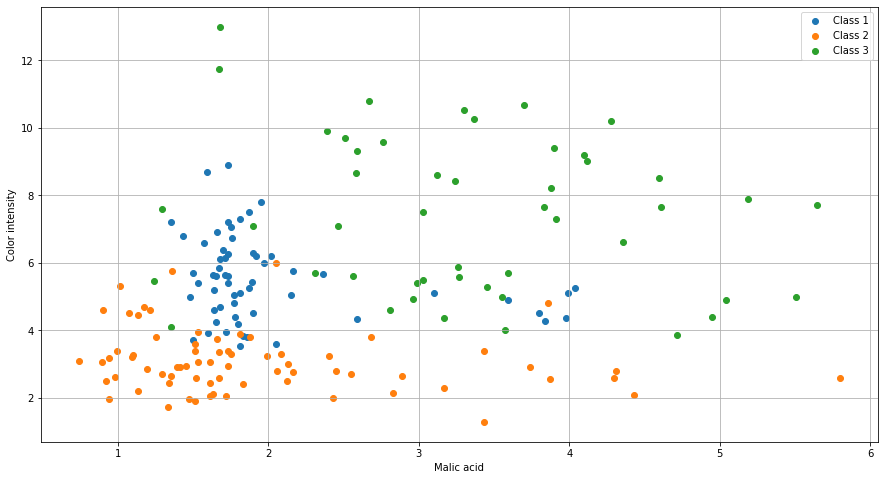

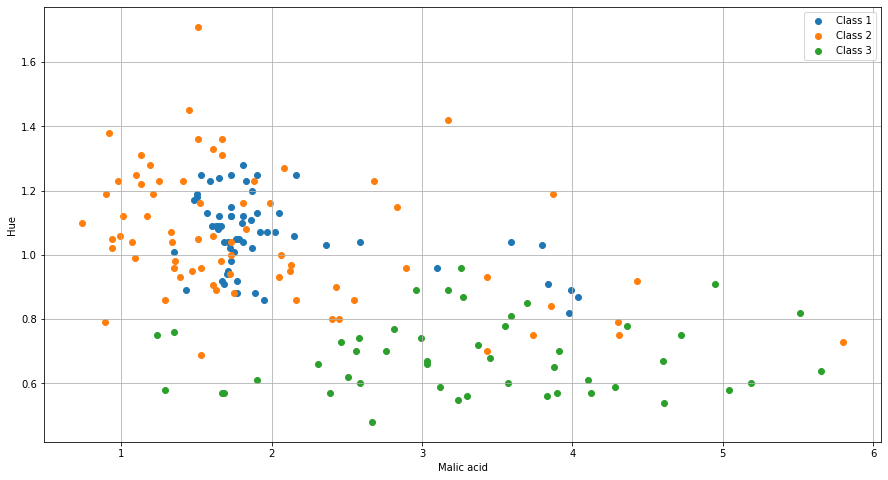

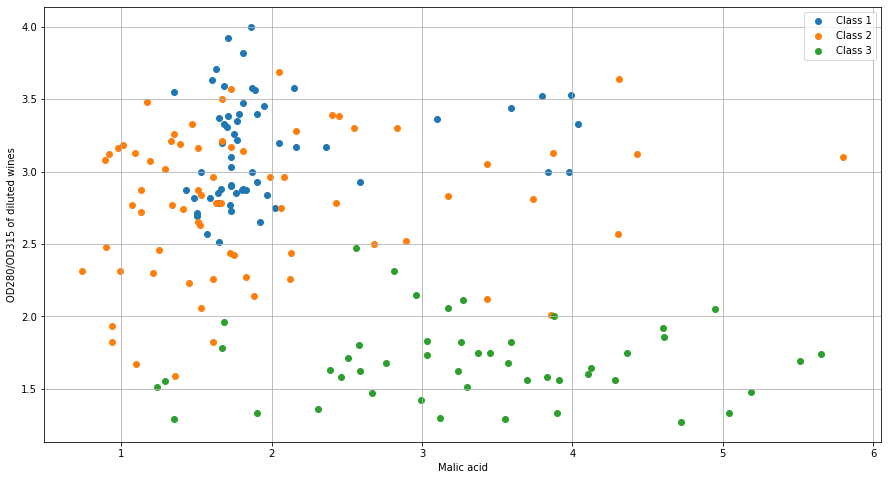

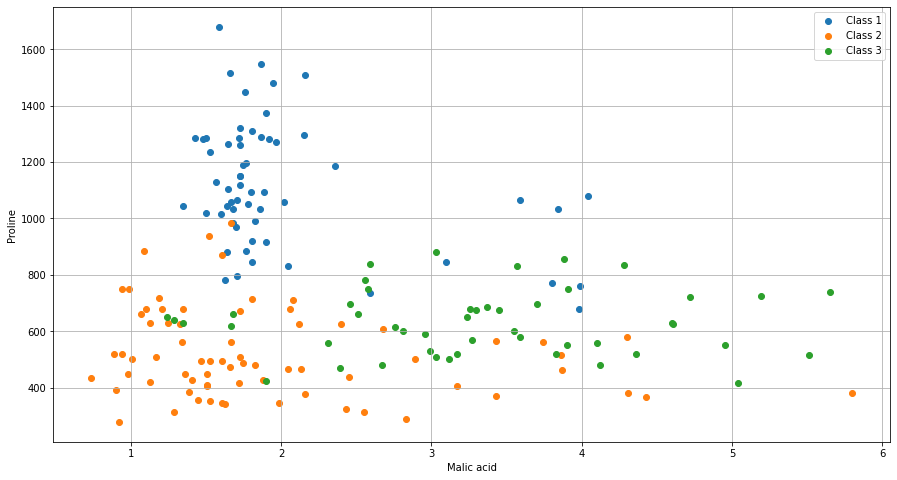

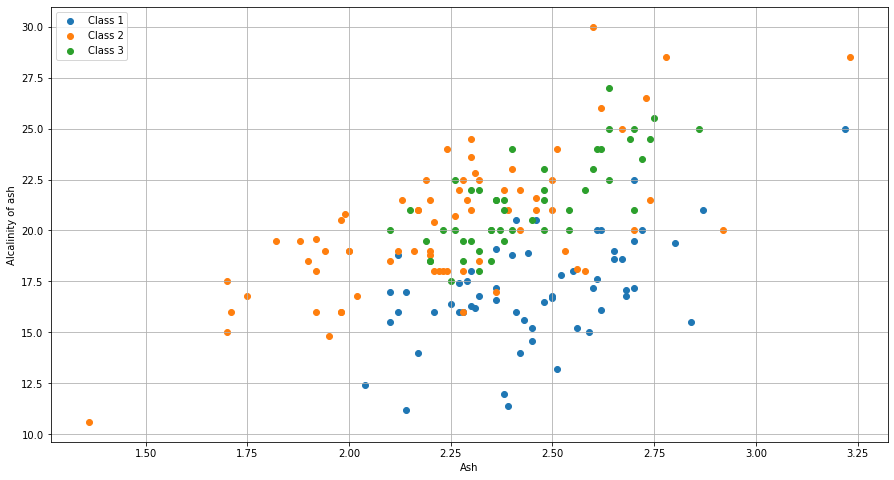

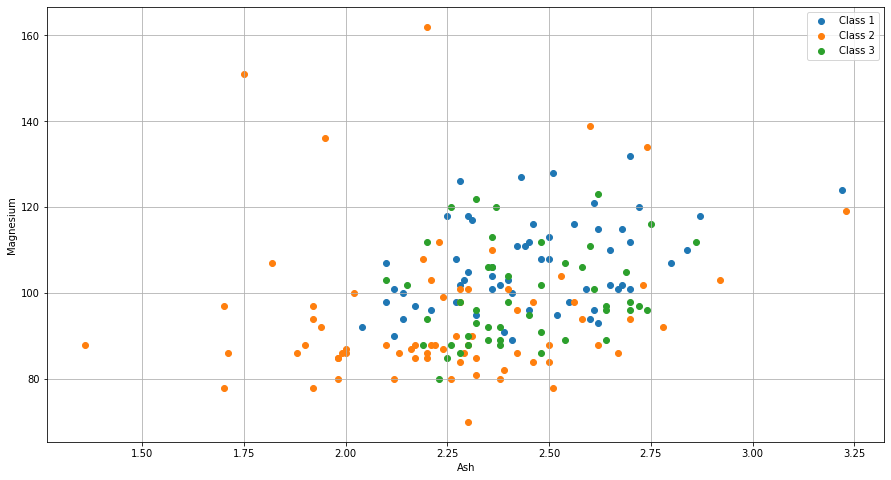

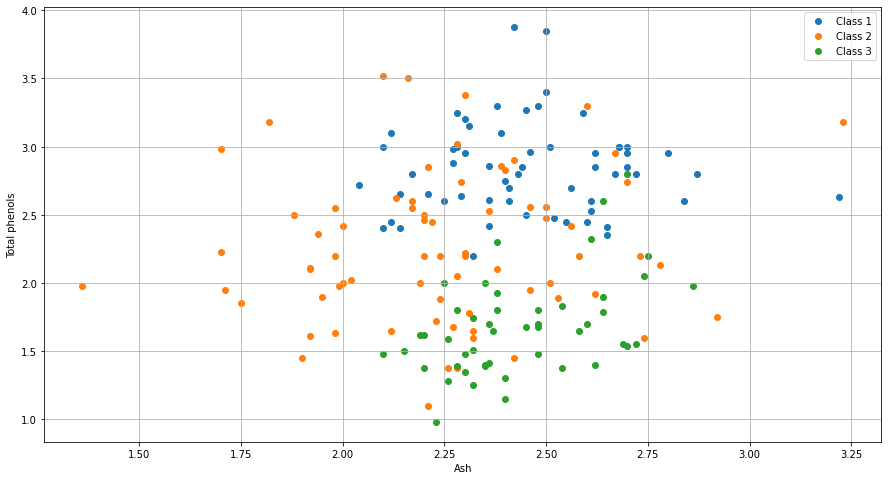

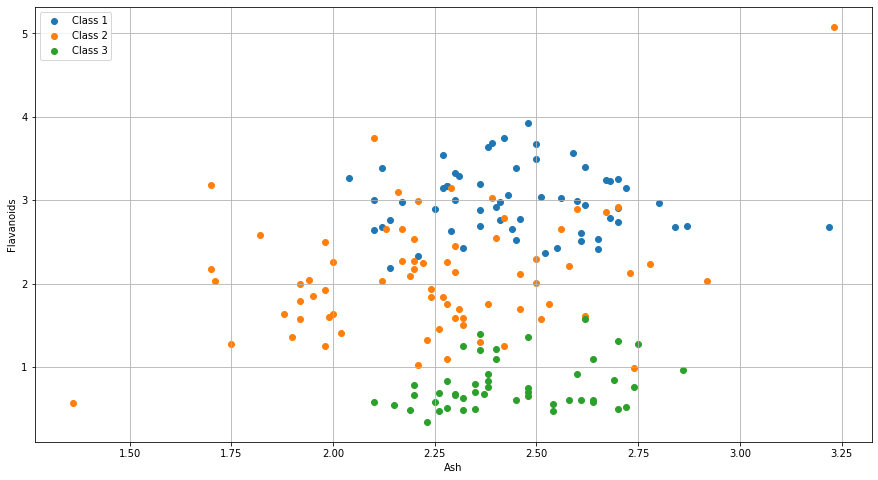

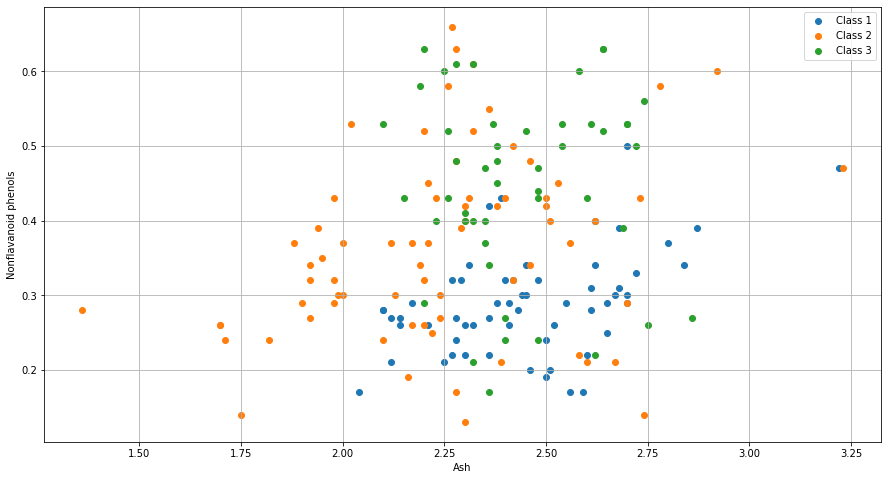

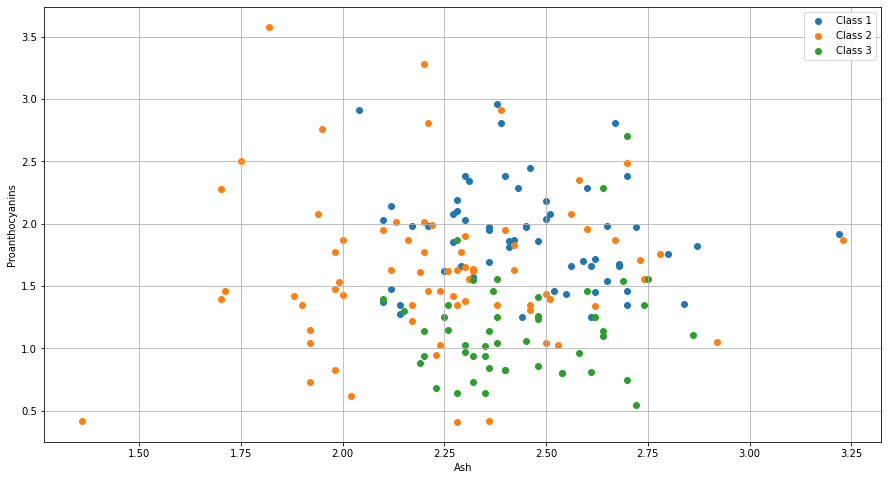

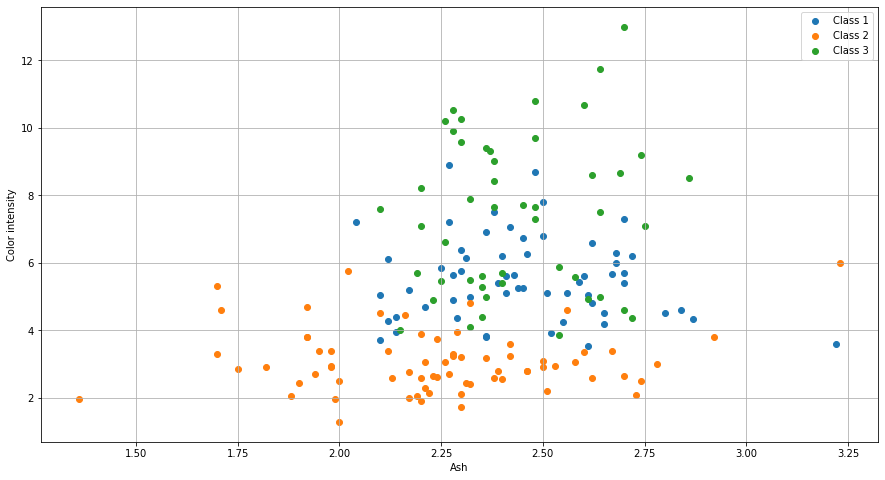

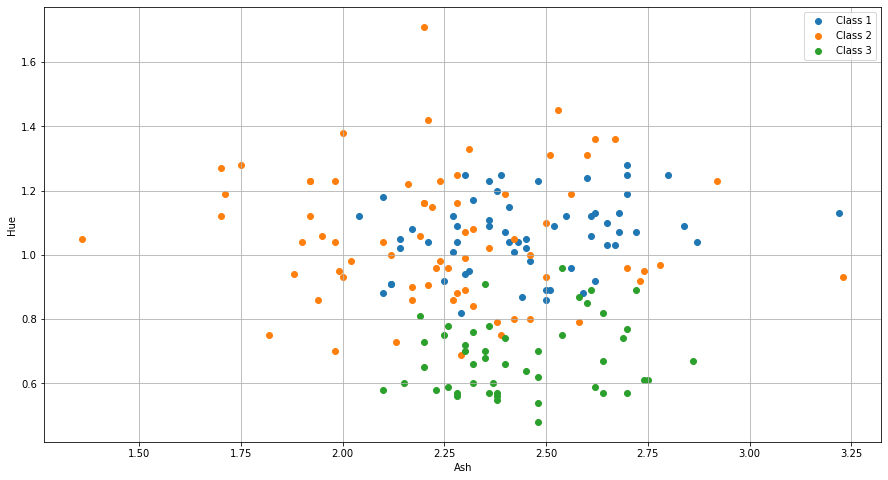

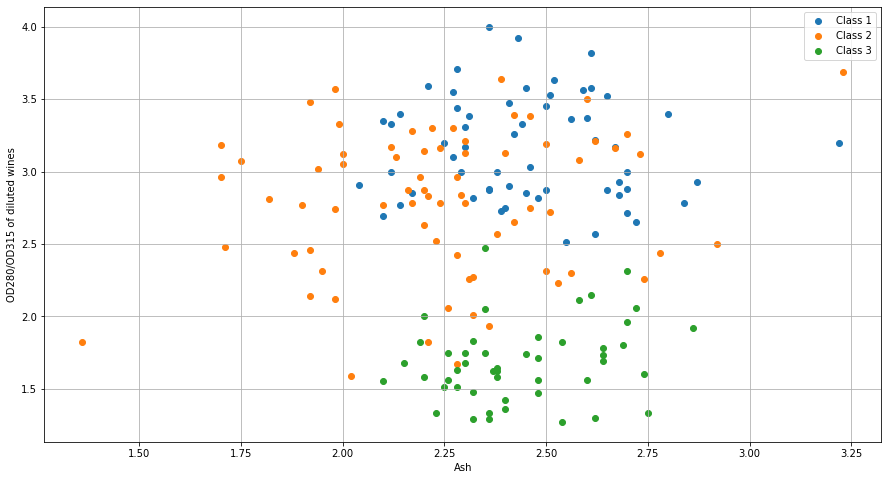

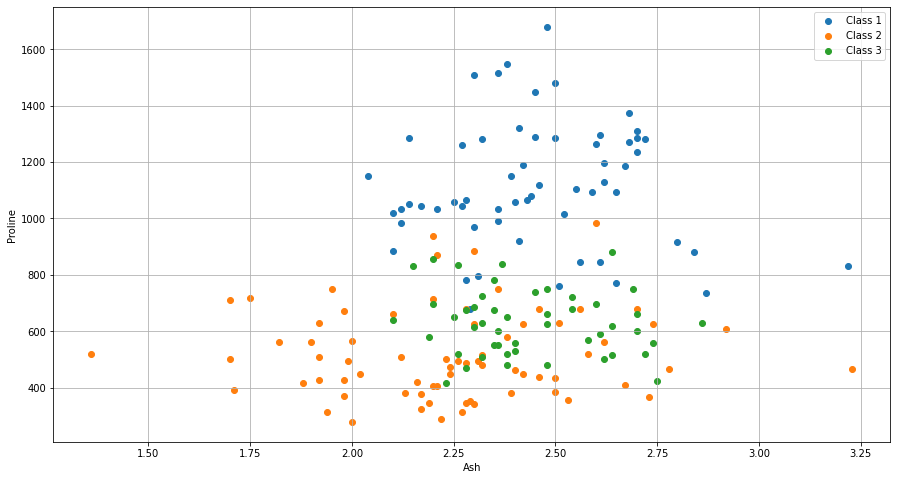

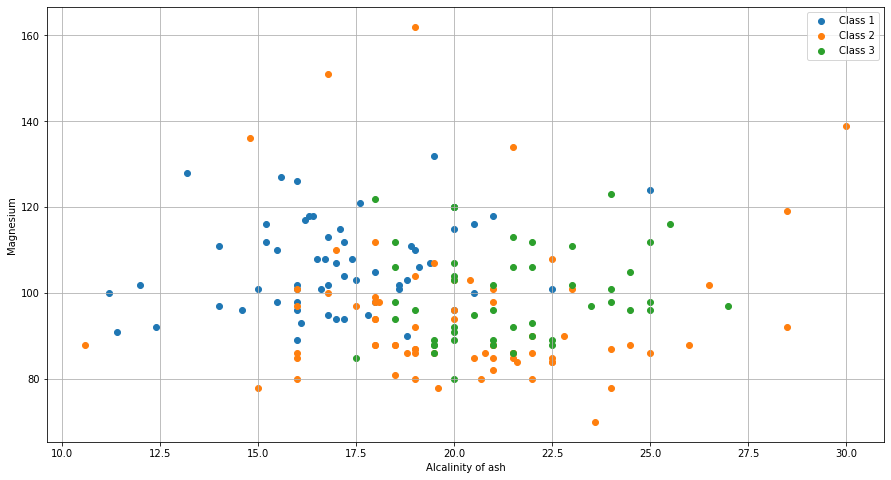

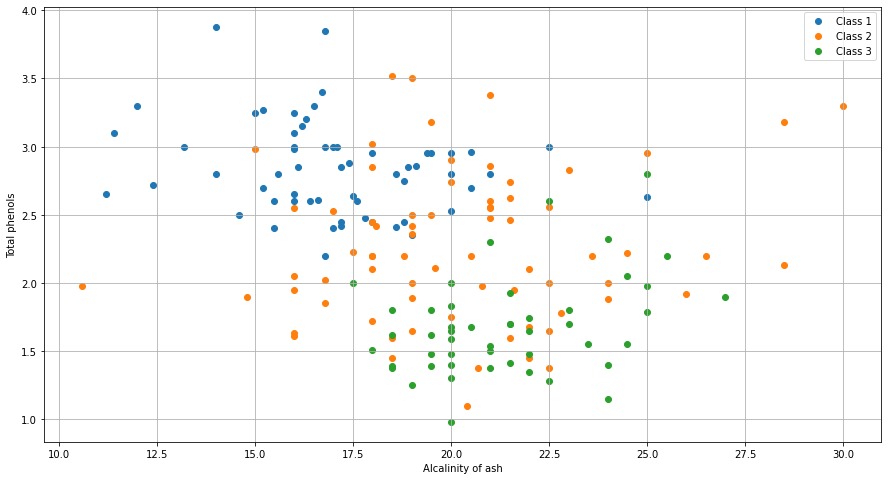

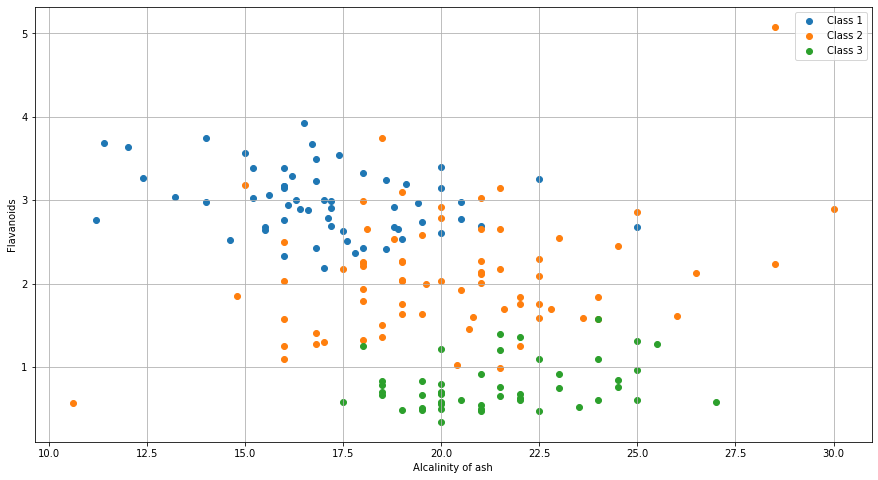

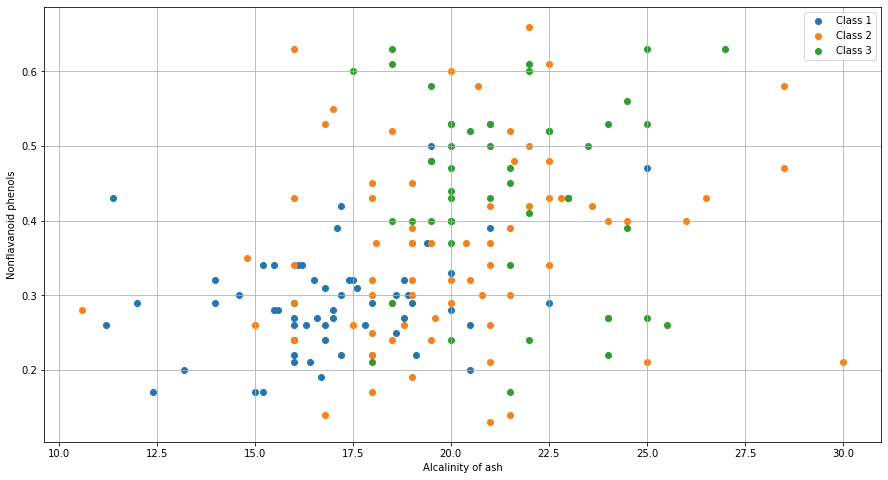

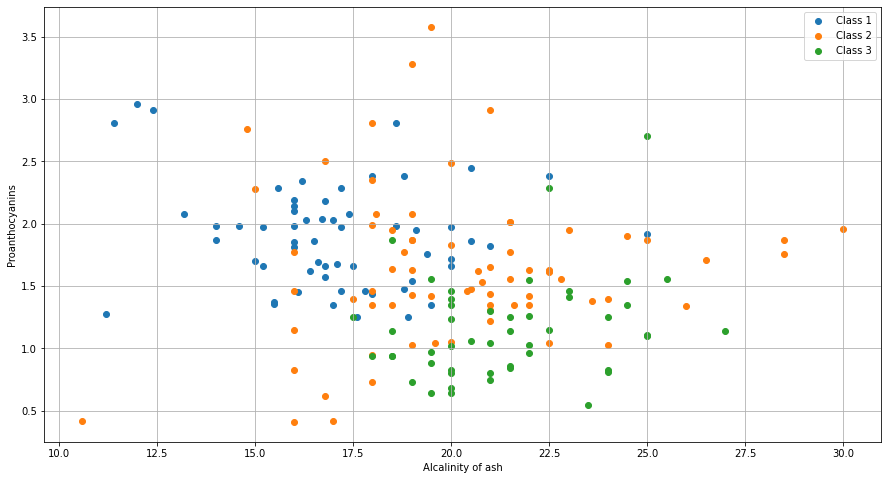

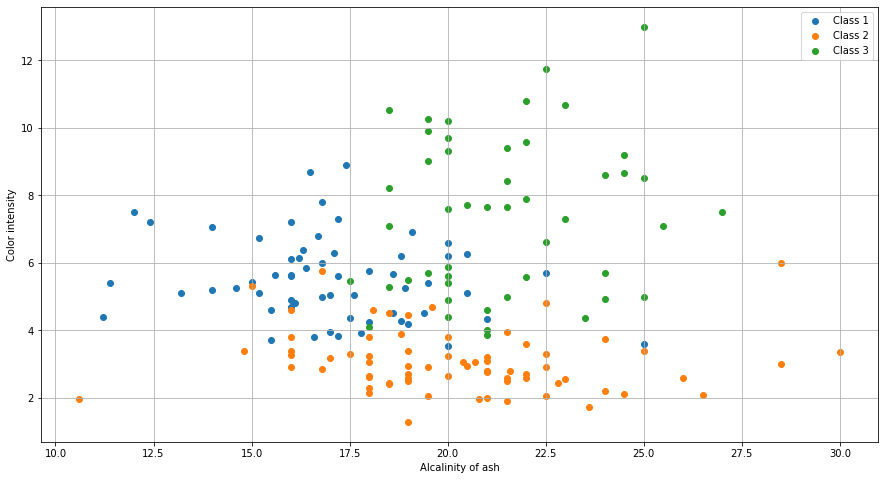

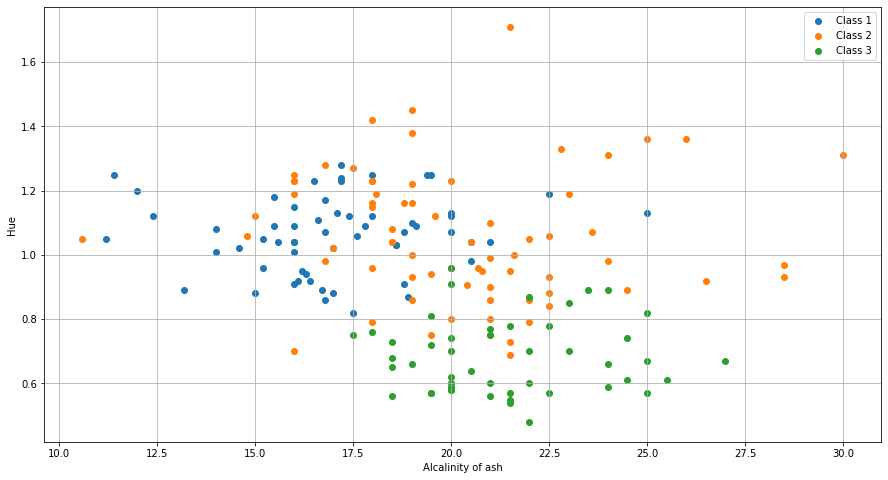

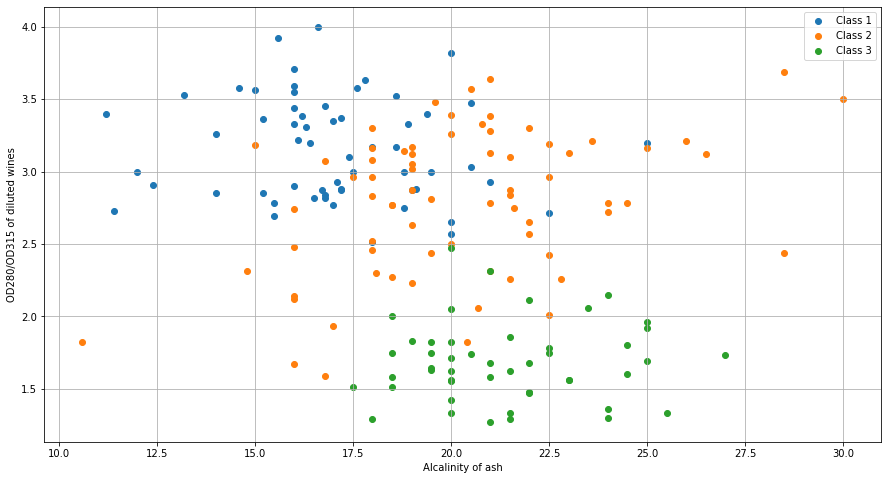

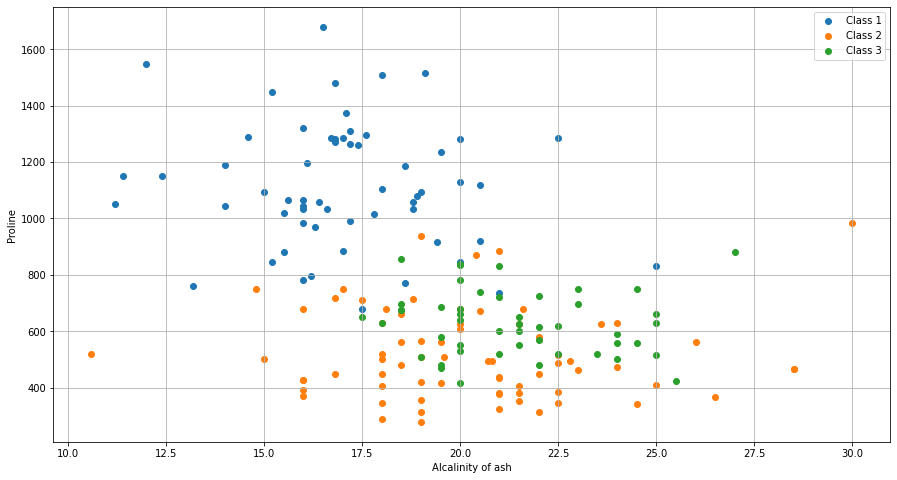

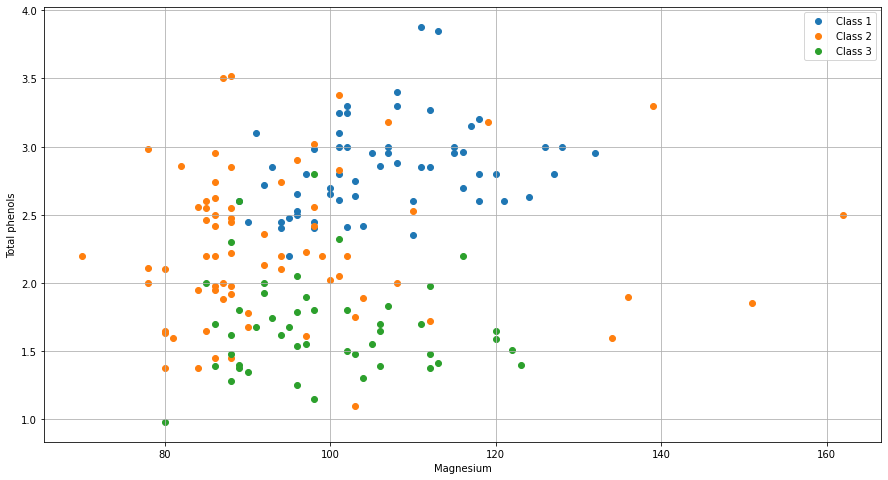

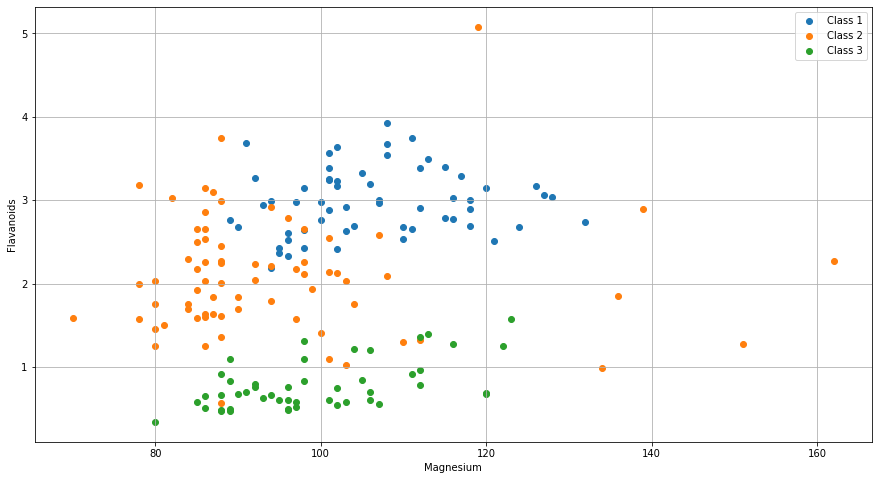

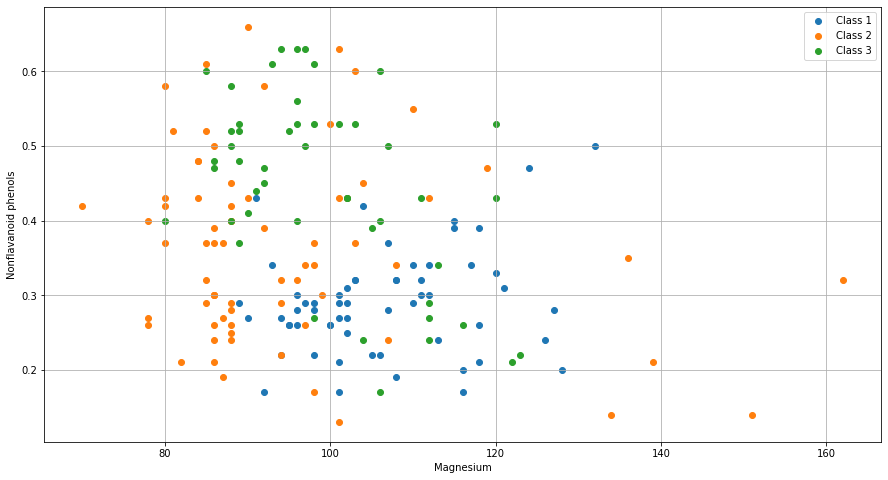

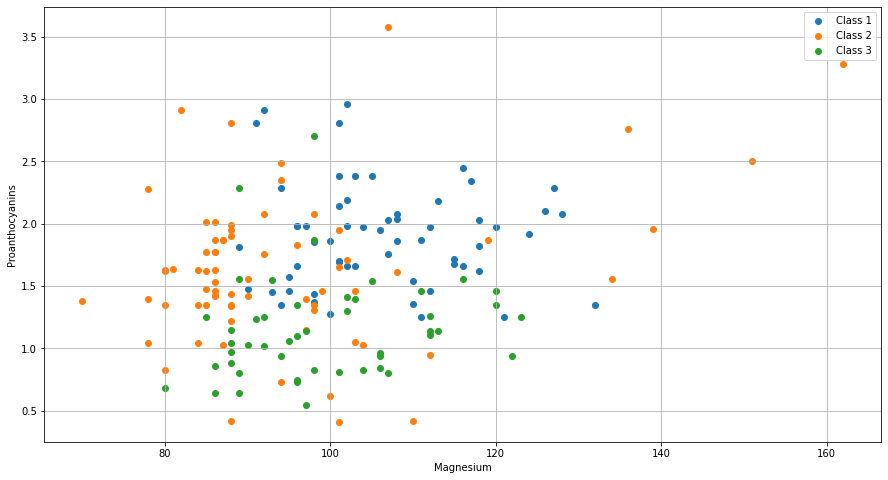

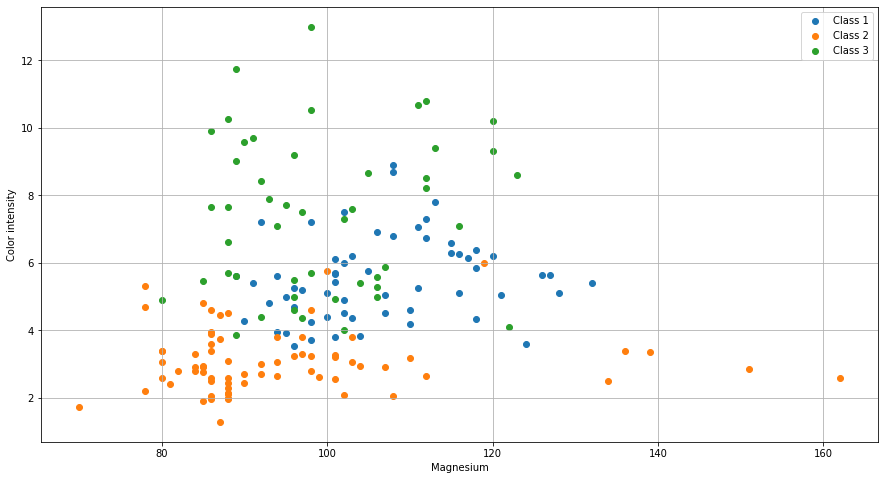

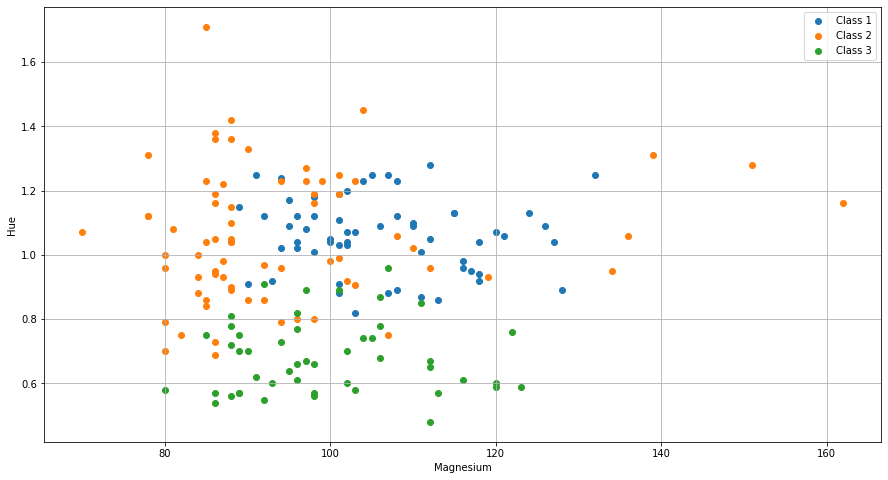

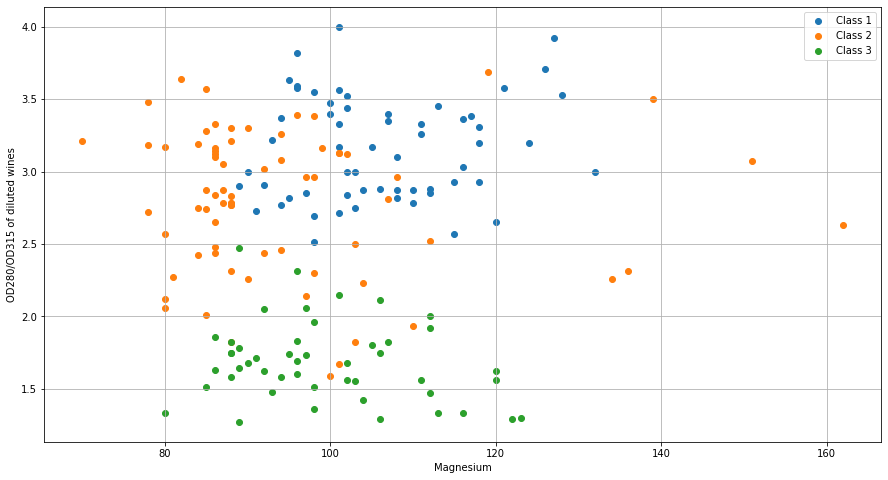

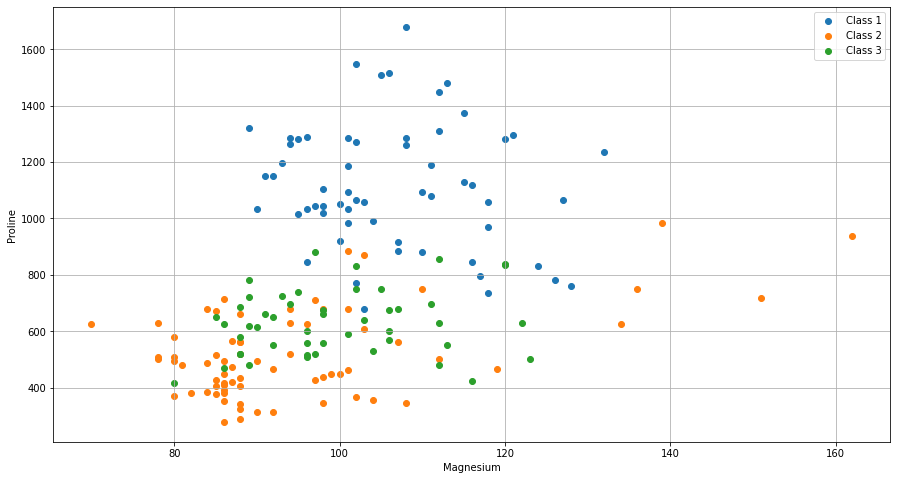

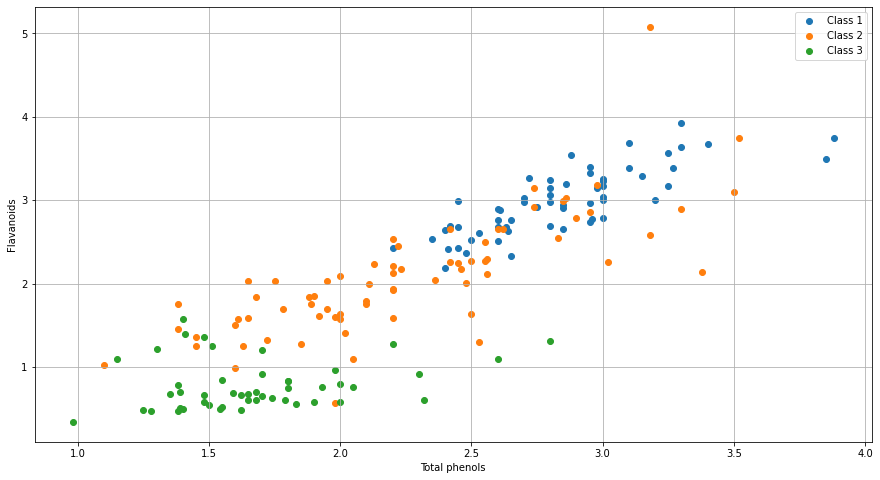

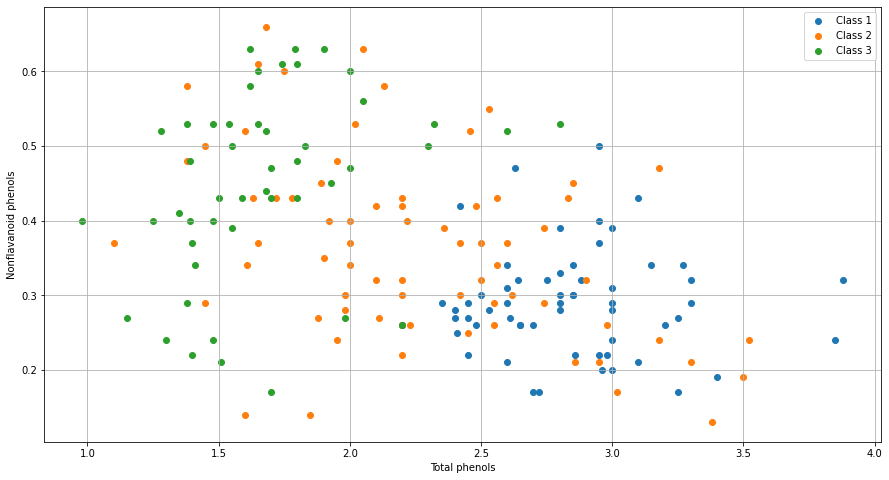

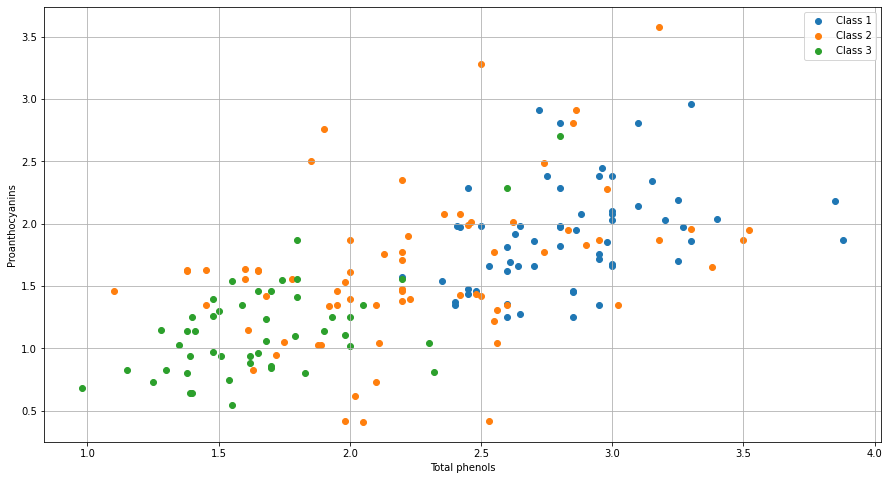

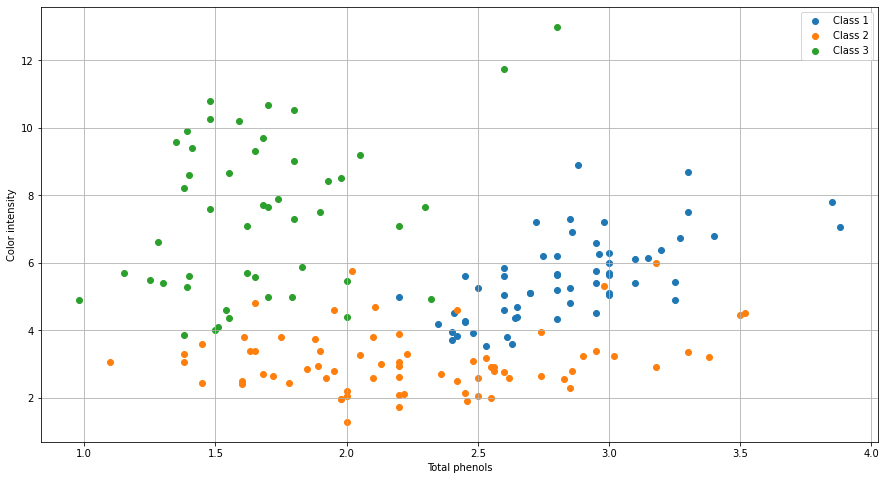

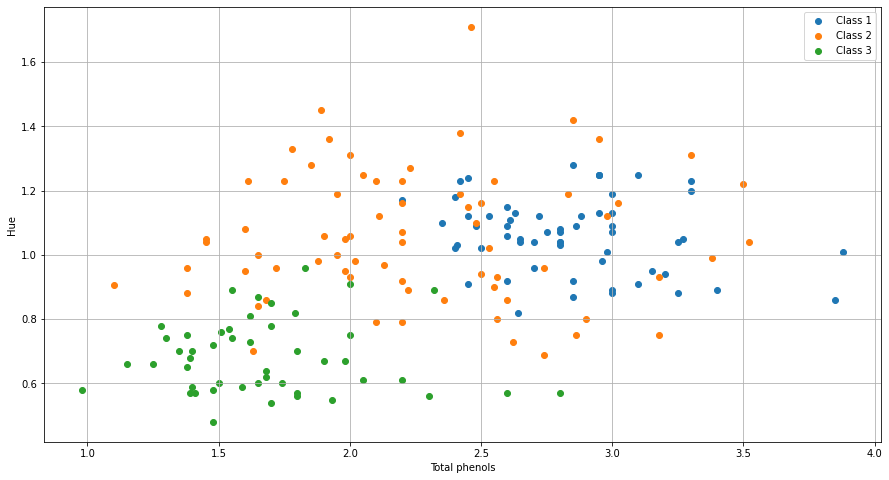

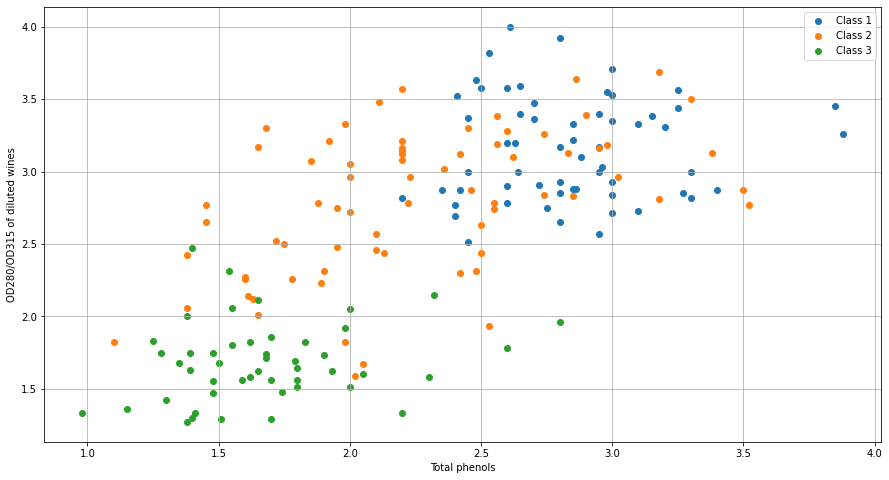

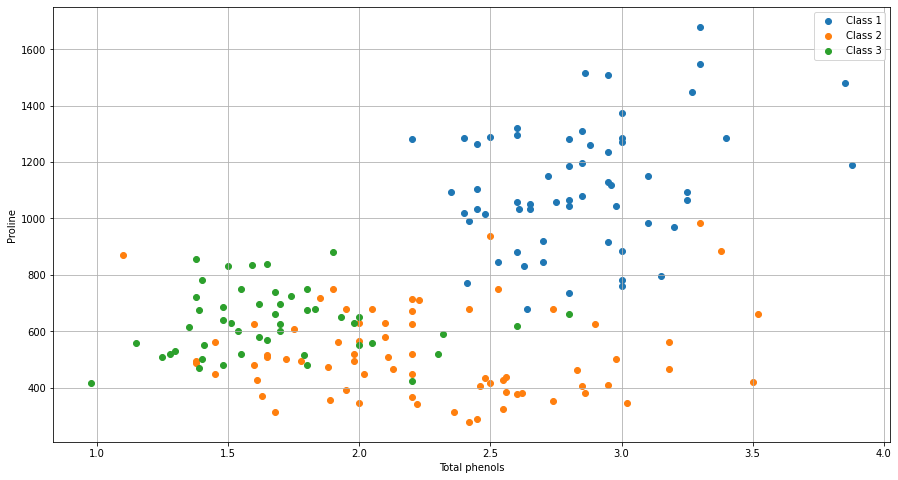

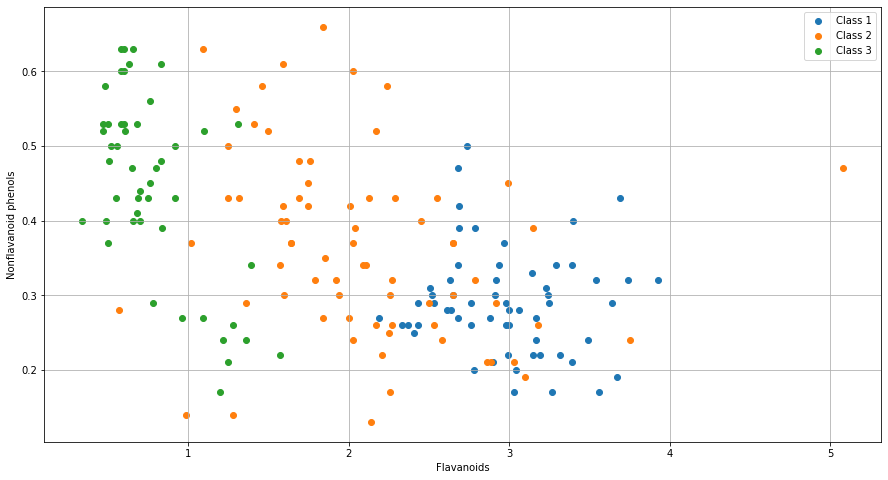

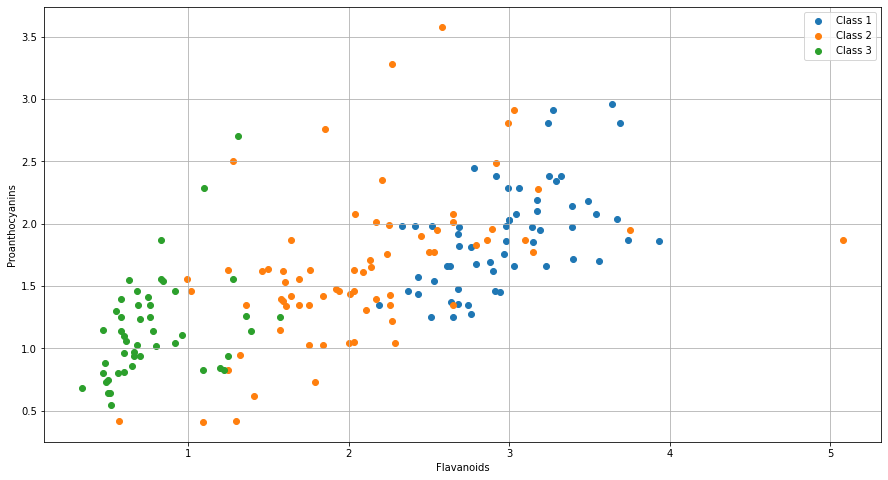

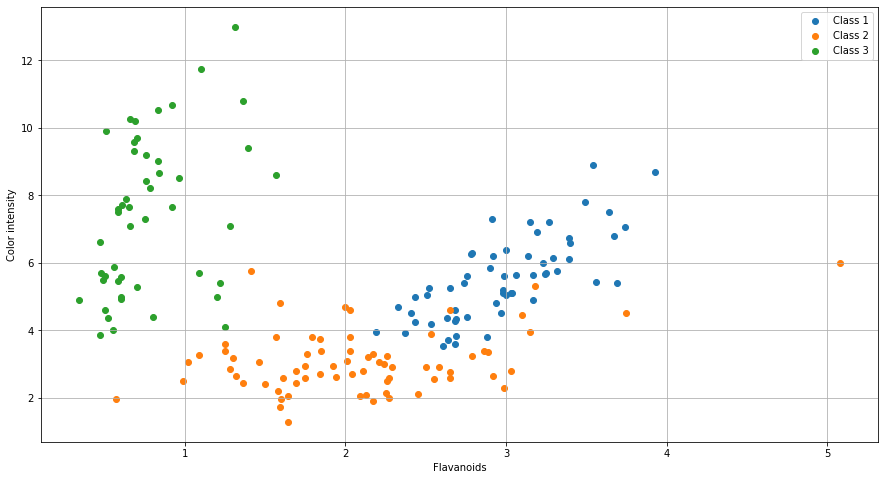

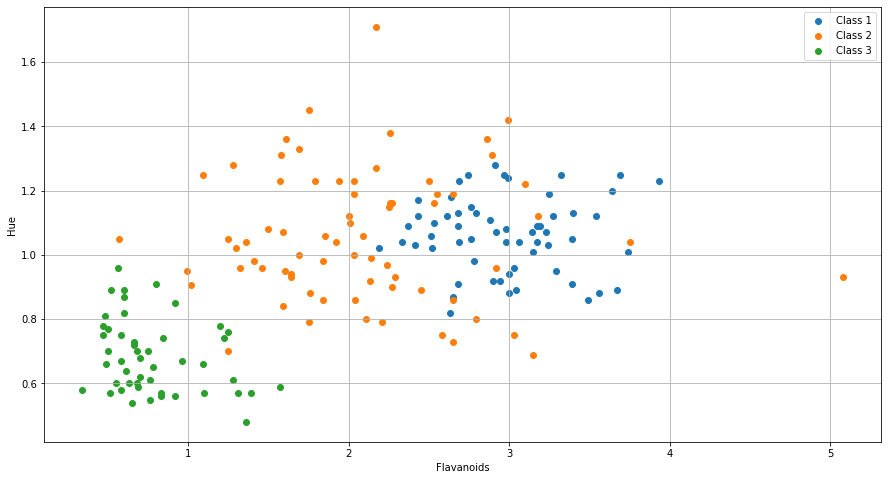

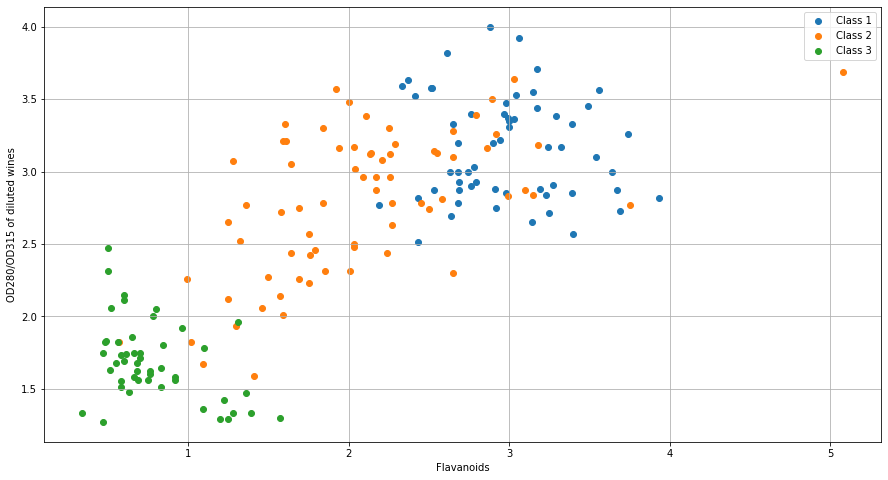

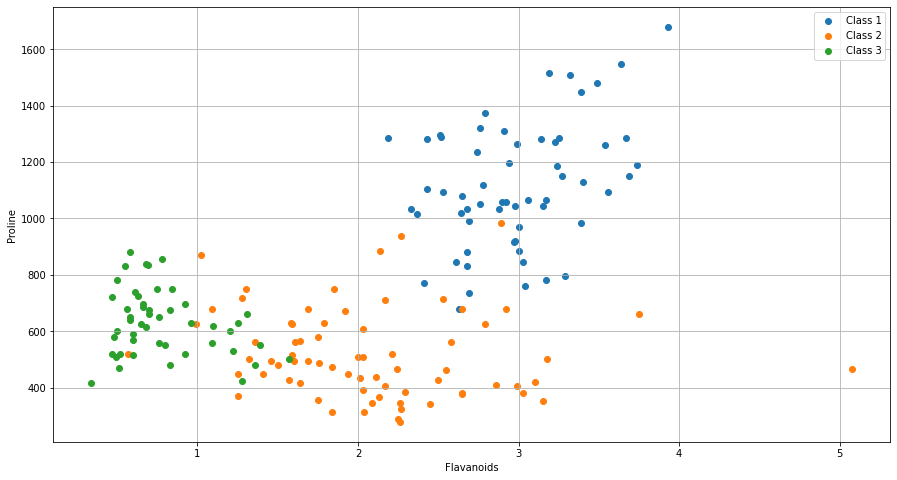

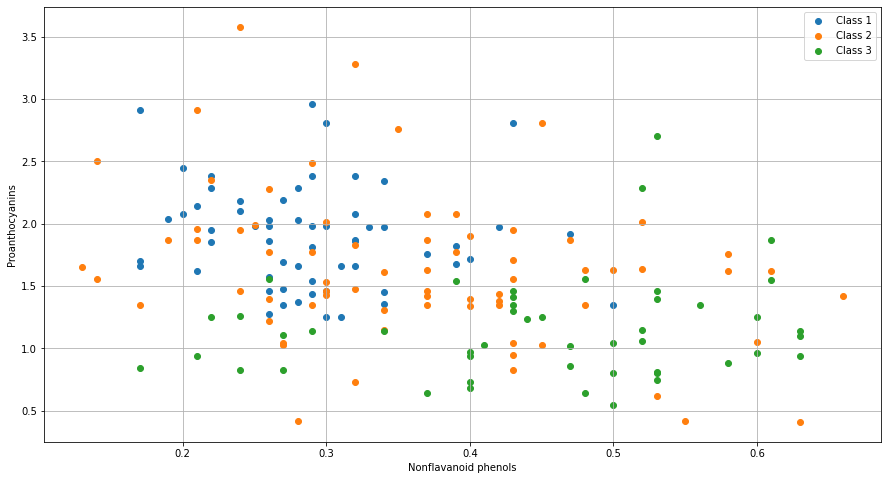

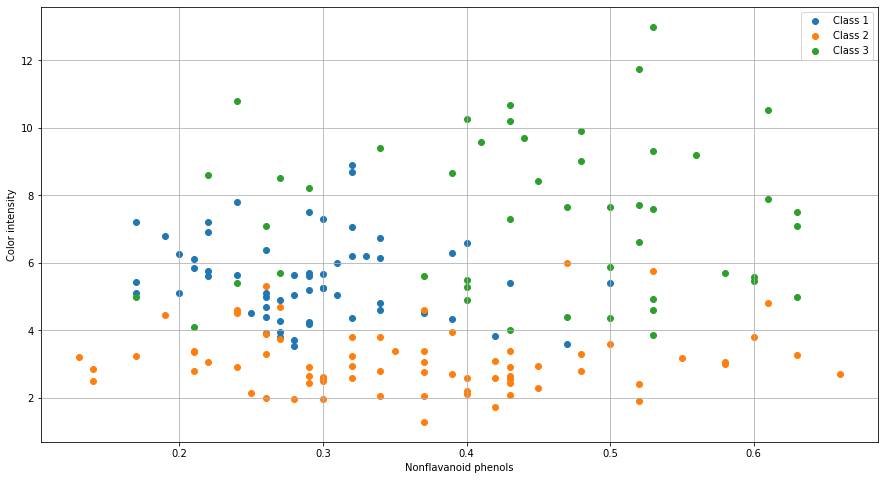

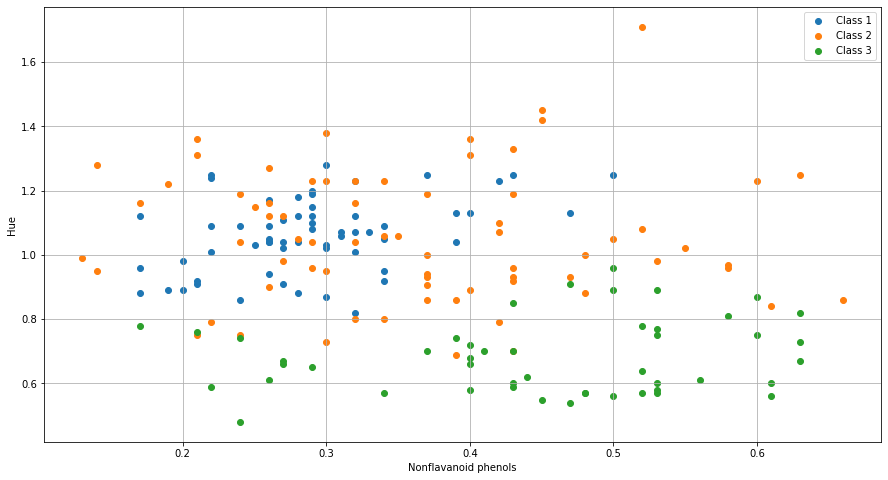

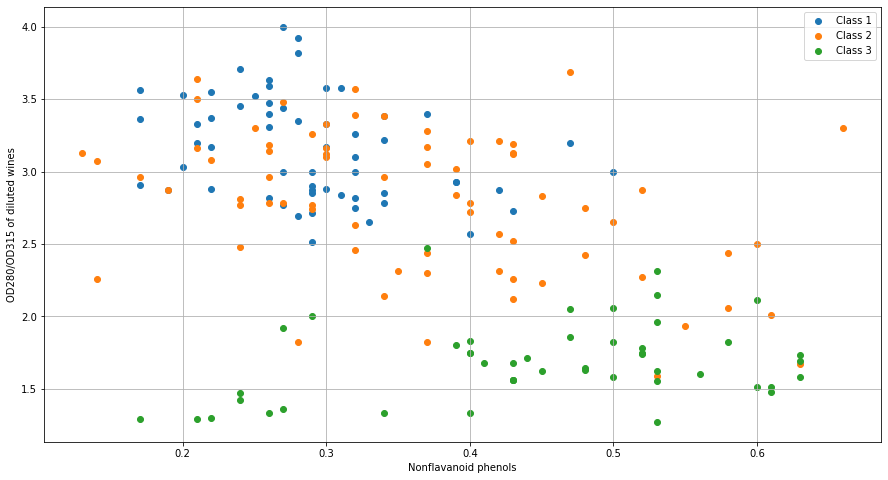

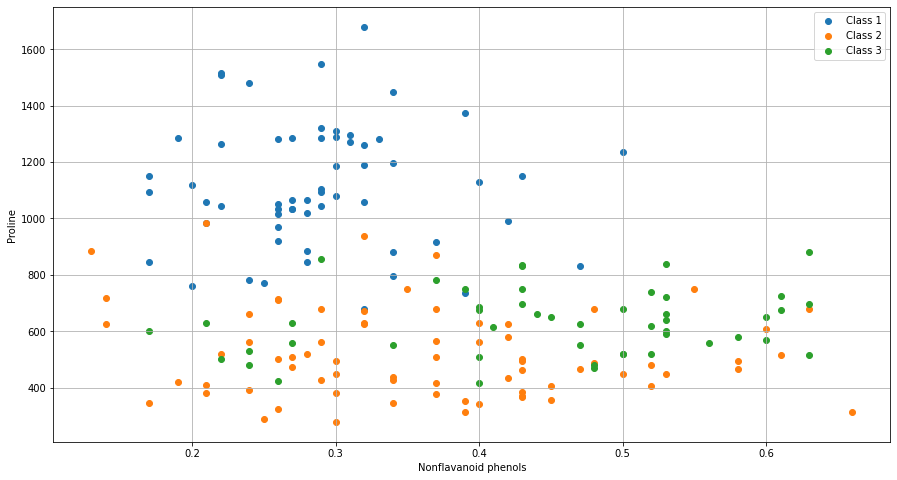

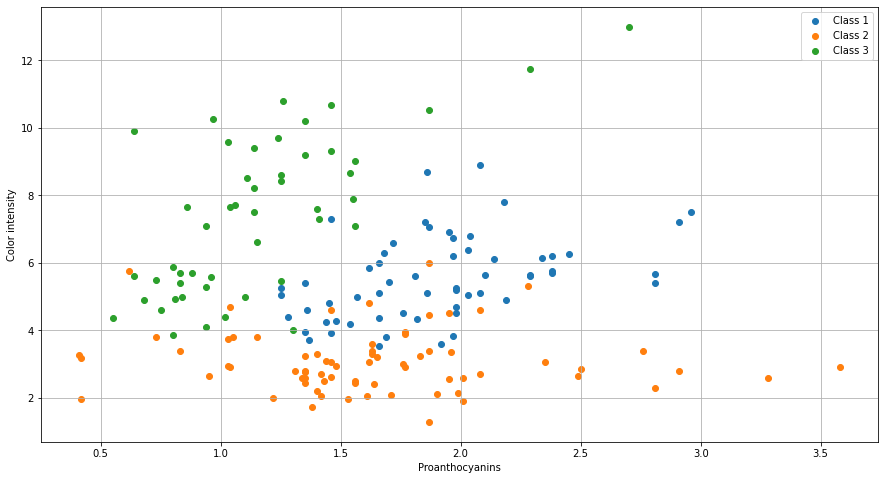

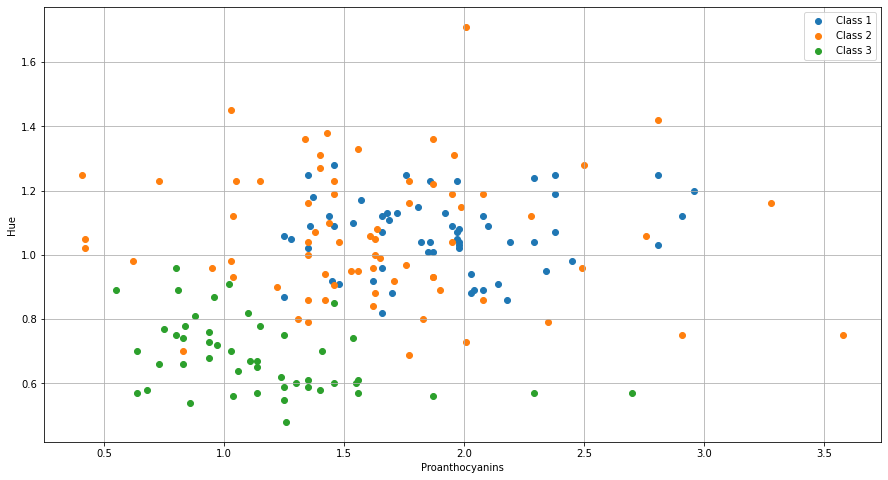

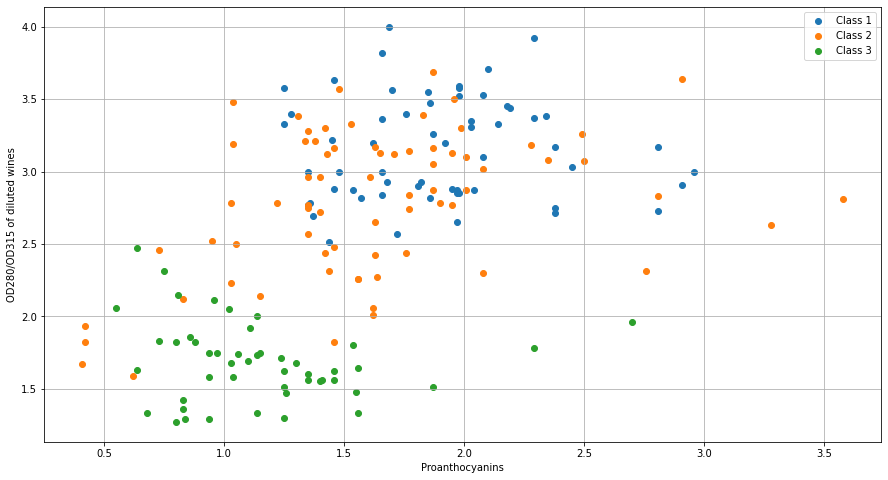

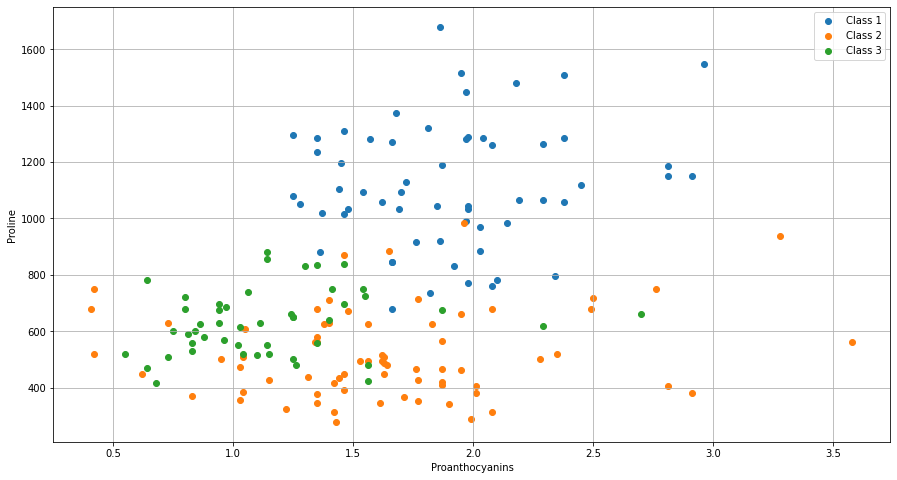

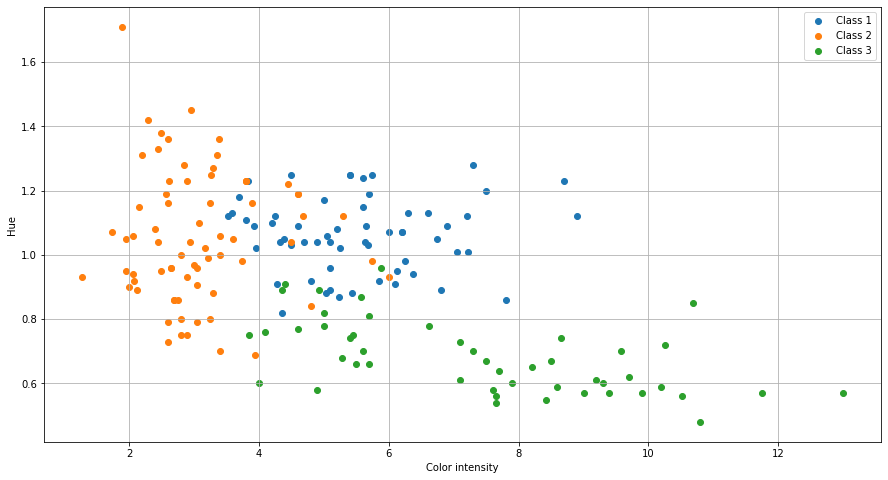

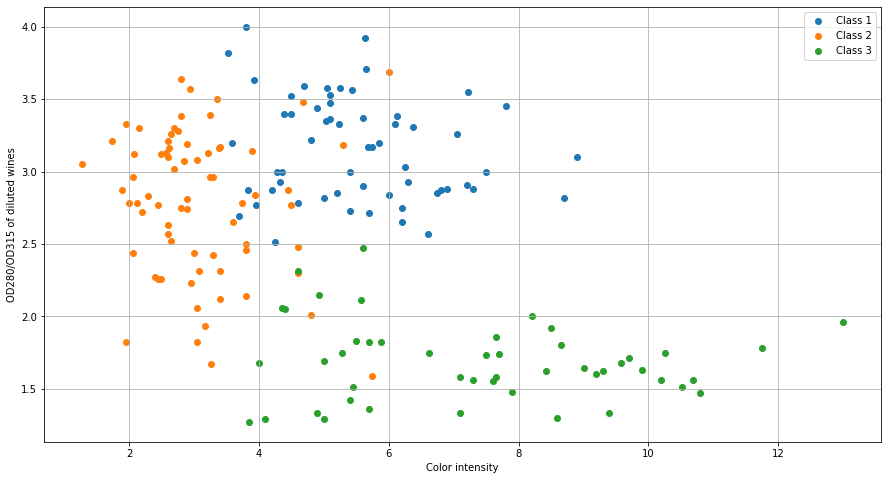

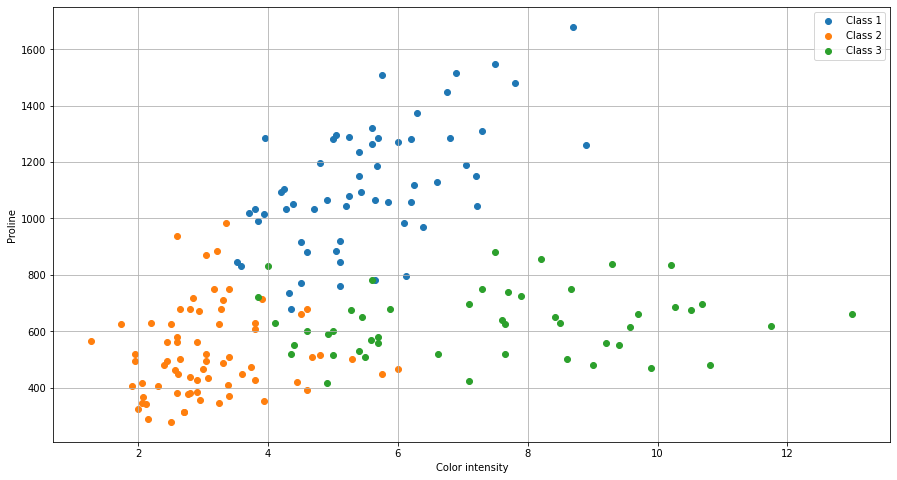

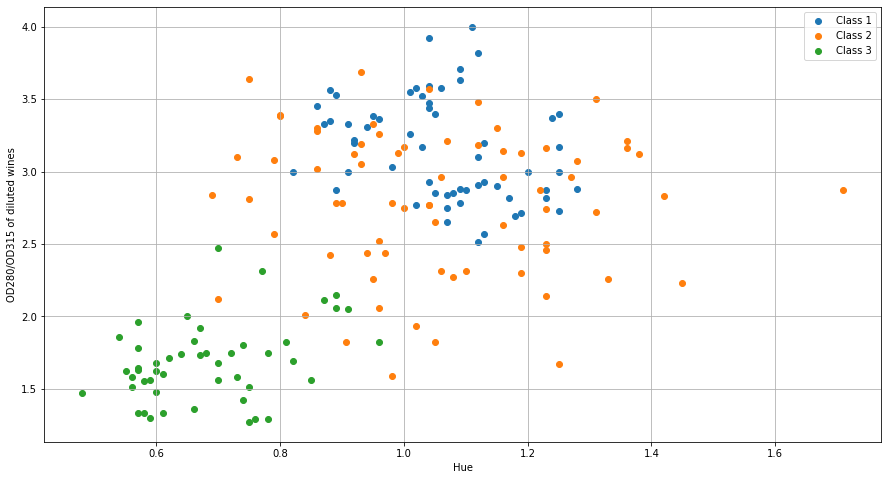

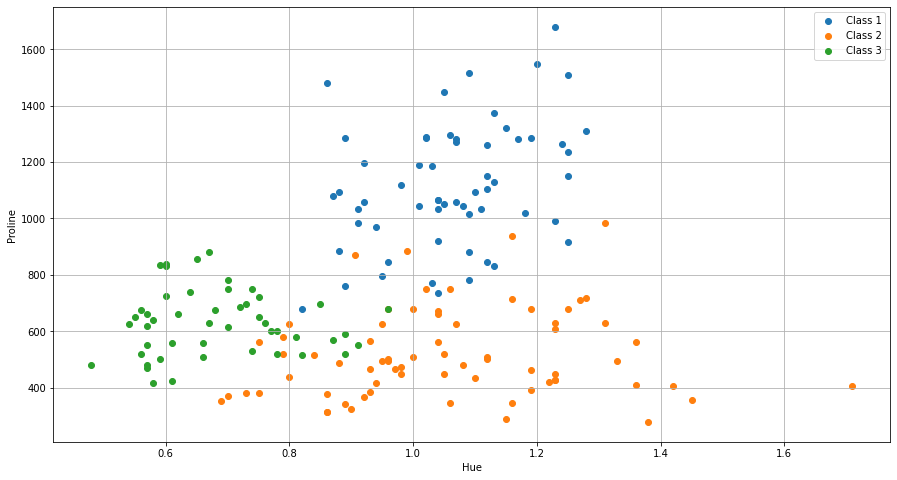

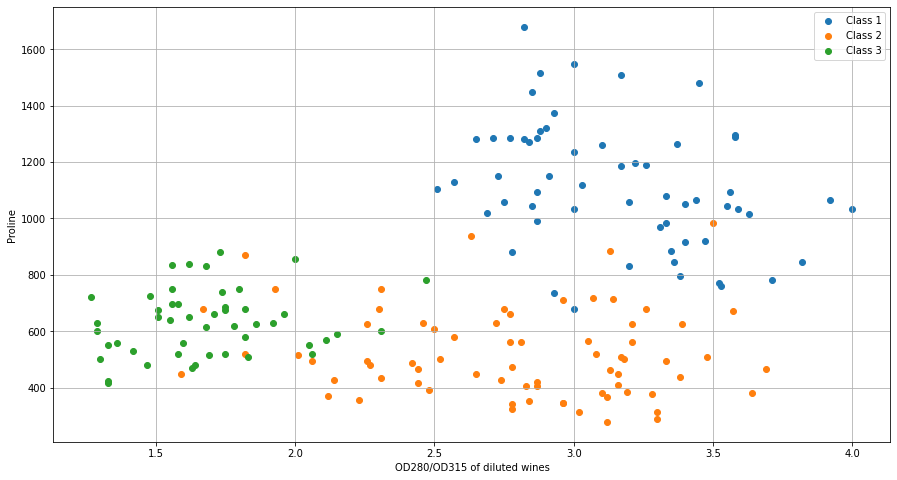

In [5]:
# on pop la première colonne car c'est juste un index
cols.pop(0)
classList = []
for i in range(3):
    classList.append(wine_df[wine_df["Class"] == i + 1])

for i in range(len(cols)):
    for j in range(i, len(cols)):
        if(i == j):
            continue
        fig, axes = plt.subplots(figsize=(15, 8))
        for k in range(3):
            axes.scatter(classList[k][cols[i]], classList[k][cols[j]])

        axes.legend(["Class 1", "Class 2", "Class 3"])
        plt.grid(True)
        plt.xlabel(cols[i])
        plt.ylabel(cols[j])
        plt.show()      
        

#### 1.3.2) Analyse des Scatter plots
Nous pouvons voir que les 3 classes sont bien séparées avec les scatterplots suivants:

1) Color intensity - Flavanoids

2) OD280/OD315 of diluted wines - alcohol

3) Flavanoids - Alcalinity of ash

4) OD280/OD315 of diluted wines - proline

5) Hue - Proline

Nous pouvons déjà voir que plusieurs catégories sont déterminates pour la classification:

1) Aclohol

2) OD280/OD315 of diluted wines

3) Color intensity

4) Flavanoids

5) Proline


Maintenant il faut analyser pour chaque catégories, la répartition des données pour en tirer 

#### 1.3.3) Création des box plots

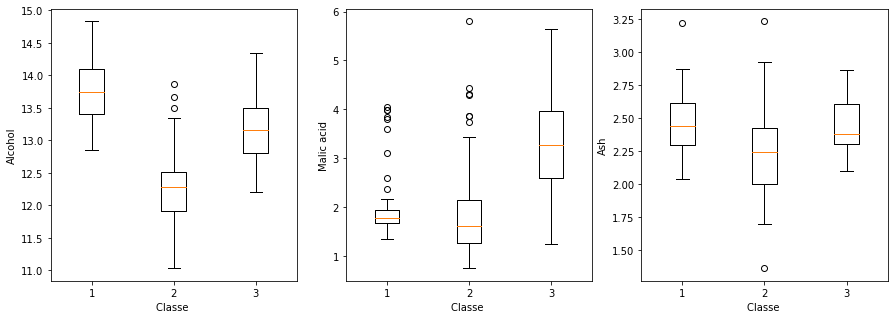

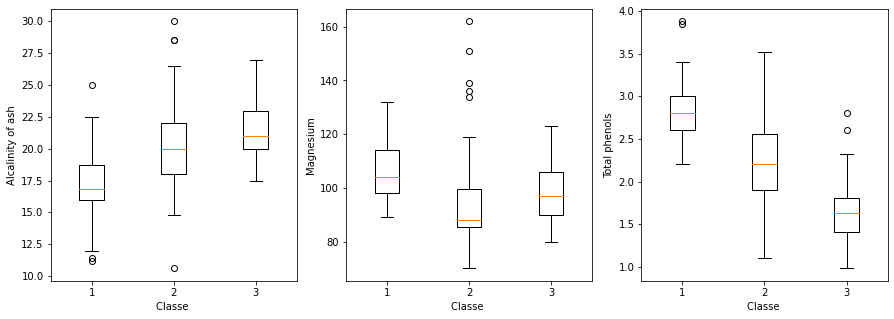

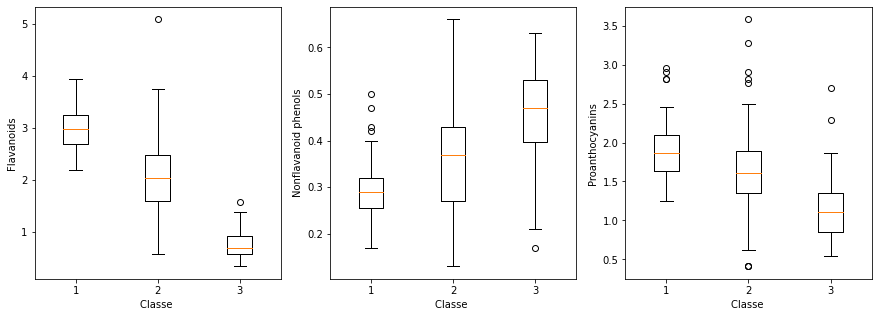

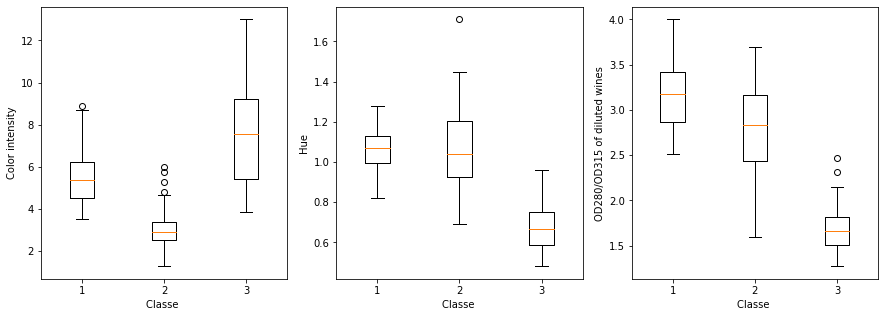

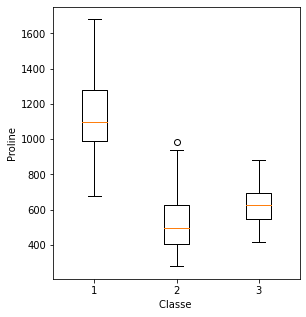

In [6]:
boxPlotData = []
for c in range(0, len(cols), 3):
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    for x in range(0,3):
        if (c+x >= len(cols)) :
            ax[x].set_visible(False)
        else:
            boxPlotData.append(ax[x].boxplot([classList[0][cols[c+x]],
                                              classList[1][cols[c+x]],
                                              classList[2][cols[c+x]]],
                                             labels = lab))
            ax[x].set_ylabel(cols[c+x])
            ax[x].set_xlabel("Classe ")


#### 1.3.4) Analyse des données boxplot

Comme pour les scatter plots nous pouvons voir des ces catégories lesquelles sont les mieux démarquées les unes des autres. Pour cela, il suffit de prendre celles dont les 3 classes ne se chevauchent pas dans les boxplots:

1) Aclohol

2) Total Phenols

3) Flavanoids

4) Color intensity

5) Proline

6) OD280/OD315 of diluted wines

Ce sont donc ces variables que nous allons analyser dans notre "model"


## Exercice 2 Modèle à base de règles

Utilisez les box-plots des variables qui ont une majorité de valeurs différentes pour les différentes classes afin de programmer des règles (if-then-else) permettant la classification de chaque observation. a) Essayez au moins trois variables de manière individuelle et b) deux classificateurs à multiples variables (p.ex., deux ou trois) et évaluez le nombre d’observations qui sont correctement classées (accuracy) par ses modèles.

### 2.1) Calcul de l'accuracy pour quelques variables individuelles

Ici, nous voulons compter le nombre d'éléments entre Q1 et Q3 des 3 boxplots qui appartiennent réellement à la classe
afin de calculer l'accuracy. Nous voulons éviter de faire cela à la main, donc avons pensé au code suivant:

In [7]:
def countPosNeg(prediction, actual):
    truePos=0
    trueNeg=0
    for i in range(len(prediction)):
        if int(prediction[i]) == int(actual[i]):
            truePos += 1
        else:
            trueNeg += 1
    return truePos, trueNeg

def printStat(truePos, trueNeg):
    print(" - True positives : ",truePos)
    print(" - True negatives : " ,trueNeg)
    accuracy = round((truePos / (truePos + trueNeg)  * 100), 2)
    print(" - Accuracy ",accuracy,"%","\n")
    return accuracy

Alcohol :
 - True positives :  126
 - True negatives :  52
 - Accuracy  70.79 % 

Total phenols :
 - True positives :  118
 - True negatives :  60
 - Accuracy  66.29 % 

Flavanoids :
 - True positives :  136
 - True negatives :  42
 - Accuracy  76.4 % 

Color intensity :
 - True positives :  122
 - True negatives :  56
 - Accuracy  68.54 % 

OD280/OD315 of diluted wines :
 - True positives :  110
 - True negatives :  68
 - Accuracy  61.8 % 

Proline :
 - True positives :  126
 - True negatives :  52
 - Accuracy  70.79 % 



Text(0.5, 1.0, 'Accuracy de chaque variable')

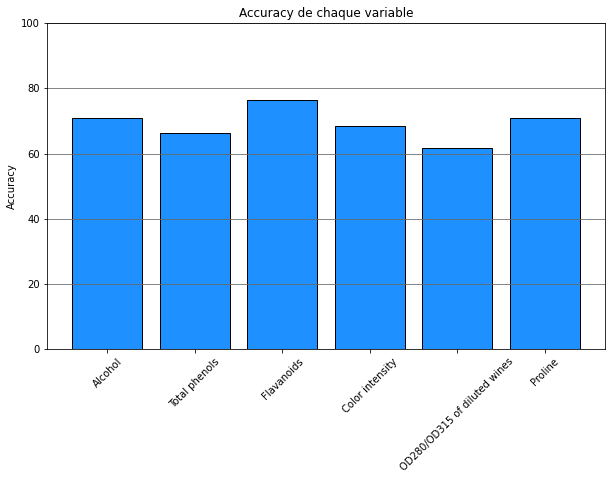

In [8]:
med = "medians"
accuracies = []
ordVariables = []
variables = ["Alcohol","Total phenols", "Flavanoids", "Color intensity", "Proline" ,"OD280/OD315 of diluted wines"]
for i in range(0, len(cols), 3):
    for j in range(3):
        x = i + j
        if (x >= (len(cols))) :
            continue # sert à éviter un dépassement de range
        if cols[x] in variables :
            classes = []
            boxPlot = {}
            #Récupération des données des boxplots précédents
            boxPlot[cols[x]] = (ax[j].boxplot([classList[0][cols[x]],
                                               classList[1][cols[x]],
                                               classList[2][cols[x]]],
                                              labels = lab))
            classes.extend([classList[0][cols[x]],
                            classList[1][cols[x]],
                            classList[2][cols[x]]])
            
            #itération sur les variables dans chaque boxPlot
            for key, value in boxPlot.items():  
                print (key,":")
                truePos = trueNeg = 0
                ordVariables.append(key)

                #Récupération des médiannes selon la classe
                dataList=[]
                for d in range(3):
                    dataList.append((value[med][d].get_ydata())[0])
                
                #Tri des médiannes 
                medians = sorted(dataList)
                dataTop = medians[2]
                dataMiddle = sorted(medians)[1]
                
                for d in range(len(dataList)):
                    if dataMiddle == dataList[d]:#Trouver la classe avec la médiane du milieu
                        middle = d
                    if dataTop == dataList[d]:#Trouver la classe avec la médiane du haut
                        top = d

                #Récupération de Q1 et de Q3 pour la classe avec la médianne moyenne.
                data = value["boxes"][middle].get_ydata()
                dataMin = round(min(data), 2)
                dataMax = round(max(data), 2)
                #Permet de tester pour les trois classes
                for k in range(0, 3):
                    #itération sur toutes les data
                    for l in classes[k]:
                        # affectation des TP et TN en fonction de si les data sont dans la bonne classe
                        if(l > dataMax):
                            if k == top:
                                truePos +=1 
                            else:
                                trueNeg +=1
                        elif(l > dataMin and l < dataMax):
                            if k == middle:
                                truePos +=1                                
                            else:
                                trueNeg +=1
                        else:
                            if k != middle and k != top:
                                truePos +=1
                            else:
                                trueNeg +=1
                                
                accuracies.append(printStat(truePos,trueNeg))

plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
plt.bar(ordVariables, accuracies, color=color, edgecolor=edge)
plt.grid(visible=True, axis="y", color="dimgray")
axe = plt.gca()
axe.set_ylim([0, 100])
axe.set_ylabel("Accuracy")
axe.set_title("Accuracy de chaque variable")

#### 2.1) Conclusions

Nous pouvons voir que notre "modèle" de classification se basant sur les données entre Q1 et Q3 a une accuracy allant de 66% à 76% selon les variables, ce qui n'est pas extrêmement précis.

### 2.2) Calcul de l'accuracy pour classificateur à 2 variables

Ici, nous avons décidé de mettre les valeurs de chaque variable en "dur", car le faire automatiquement à partir des boxplots (comme au point 2.1) n'aurait pas fonctionné. En effet, l'idée était de prendre les valeurs min et max de chaque moustaches de chaque classe, pour les 2 variables. Cependant l'attribut "whiskers" de l'objet boxplot nous donne des valeurs incohérentes.
A la place, nous avons essayé de catégoriser les données à l'aide des scatterplots

####  Flavanoids vs Color intensity

In [9]:
classPrediction = []
accuracies = []
variables = [wine_df["Color intensity"], wine_df["Flavanoids"], wine_df["Alcohol"], wine_df["OD280/OD315 of diluted wines"]]
colorIntensities = variables[0]
flavanoids = variables[1]
actualClass = wine_df["Class"]
for i, colorIntensity in enumerate(colorIntensities):
    if(colorIntensity < 14 and colorIntensity > 3.5 and flavanoids[i] < 1.5):
        predictedClass = "3"
    elif(colorIntensity < 4 and flavanoids[i] < 2.6):
        predictedClass = "2"
    else:
        predictedClass = "1"
        
    classPrediction.append(predictedClass)

truePos, trueNeg = countPosNeg(classPrediction, actualClass)
accuracies.append(printStat(truePos, trueNeg))

 - True positives :  156
 - True negatives :  22
 - Accuracy  87.64 % 



#### Alcohol vs OD280/OD315 of diluted wine

In [10]:
classPrediction = []
alcohols = variables[2]
od = variables[3]

for i, alcohol in enumerate(alcohols):
    if(alcohol < 13.1 and od[i] < 3.7 and od[i] > 2):
        predictedClass = "2"
    elif(alcohol > 13.1 and od[i] > 2.5):
        predictedClass = "1"
    else:
        predictedClass = "3"

    classPrediction.append(predictedClass)

truePos, trueNeg = countPosNeg(classPrediction, actualClass)
accuracies.append(printStat(truePos, trueNeg))

 - True positives :  159
 - True negatives :  19
 - Accuracy  89.33 % 



Text(0.5, 1.0, 'Accuracy des classificateurs à 2 données')

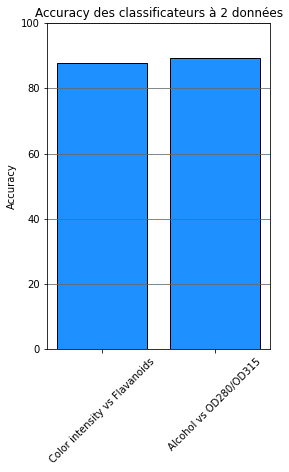

In [11]:
fig = plt.figure(figsize=(4,6))
plt.xticks(rotation=45)
var = ["Color intensity vs Flavanoids", "Alcohol vs OD280/OD315"]
plt.bar(var, accuracies, color=color, edgecolor=edge)
plt.grid(visible=True, axis="y", color="dimgray")
ax = plt.gca()
ax.set_ylim([0, 100])
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy des classificateurs à 2 données")

#### 2.2) Conclusions

Avec notre classification à la main, nous pouvons voir que nous sommes plus précis, qu'avec un test sur 1 seul attribut, avec des précisions de 87% et 89%. Par contre, l'analyse, le choix des variables et entrer les valeurs à la main prend beaucoup de temps.

## Exercice 3 L’algorithme des k plus proches voisins (k-NN)

Adaptez le code de k-NN vu en classe pour traiter le problème de classification des vins et testez la performance (accuracy) des modèles pour K=1,2,3,5,7,10. Utilisez la méthode de validation hold-out (calculez la moyenne de performances en répétant le « split » 10 fois) et la validation croisée avec n_folds=5.
Présentez un résumé de vos résultats (c.a.d., un tableau avec les résultats ainsi qu’un plot ou bar chart) et commentez ceux-ci.

#### Fonctions pour k-NN

In [12]:
from random import randrange
import random
#knn functions

# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
    distances = list()
    for train_row in train:
        dist = euclidean_distance(test_row, train_row)
        distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors

# Make a classification prediction with neighbors
def predict_classification(train, test_row, num_neighbors):
    neighbors = get_neighbors(train, test_row, num_neighbors)
    output_values = [row[0] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction

# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

# Split a dataset into a train and test set
def train_test_split(dataset, split=0.60):
    train = list()
    train_size = split * len(dataset)
    dataset_copy = list(dataset)
    while len(train) < train_size:
        index = randrange(len(dataset_copy))
        train.append(dataset_copy.pop(index))
    return train, dataset_copy

#Split a dataset into n folds
def cross_validation_split(dataset, n_folds):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)
    for _ in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split


def calculate_accuracy(train, test, actual, ks):
    results = []
    for k in ks:
        predicted = []
        for i in range(len(test)):
            predicted.append(predict_classification(train, test[i], k))
        results.append(accuracy_metric(actual, predicted))
    return results

### 3.1) Calcul de l'accuracy avec les mêmes données de test et d'apprentissage

Ici, nous allons utiliser les mêmes données d'apprentissage que les données de test pour k-NN.

Accuracy avec les mêmes données de test et d'entrainement
k =  1 : 100.0 %
k =  2 : 94.38 %
k =  3 : 94.38 %
k =  5 : 94.38 %
k =  7 : 91.01 %
k =  10 : 86.52 %


(0.0, 100.0)

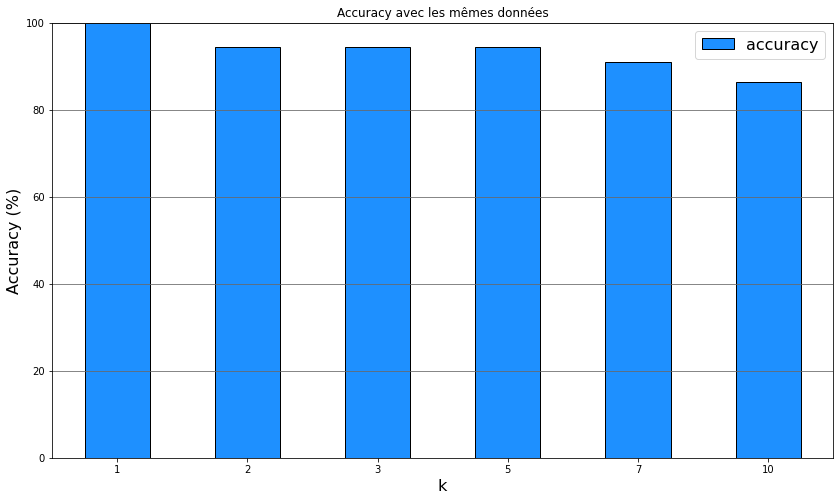

In [13]:
ks = [1,2,3,5,7,10]
results = [ks]
accuracies = []
test = train = wine_df.values.tolist()
actual = wine_df["Class"].values.tolist()
print("Accuracy avec les mêmes données de test et d'entrainement")

#Calculer les accuracies
for index, accuracy in enumerate(calculate_accuracy(train, test, actual, ks)):
    accuracies.append(accuracy)

#Calculer afficher les résultats    
results.append(accuracies)
for i, accuracy in enumerate(accuracies):
    print("k = ", ks[i], ":", round(accuracy, 2) ,"%")

df = pd.DataFrame({"k":results[0], "accuracy":results[1]})
plot = df.plot.bar(x="k", y="accuracy", rot=0, figsize=figsize, color=color, edgecolor=edge)
plt.grid(visible=True, axis="y", color="dimgray")
plot.set_xlabel("k", fontsize=fontsize)
plot.set_ylabel("Accuracy (%)", fontsize=fontsize)
plot.set_title("Accuracy avec les mêmes données")
plot.legend(prop={"size": fontsize})
plot.set_ylim([0,100])



#### 3.1) conclusions

Apparemment, nous avons une accuracy plus élevée lorsque K est faible. Les bons scores obtenus sont probablement dû à de l'overfitting, car les données d'entrainement et de test sont les mêmes.

### 3.2) Validation Hold-out 10x

Validation hold-out n° : 1
k =  1 : 85.92 %
k =  2 : 77.46 %
k =  3 : 80.28 %
k =  5 : 77.46 %
k =  7 : 76.06 %
k =  10 : 67.61 %
Moyenne =  77.46 %
Validation hold-out n° : 2
k =  1 : 84.51 %
k =  2 : 74.65 %
k =  3 : 83.1 %
k =  5 : 78.87 %
k =  7 : 77.46 %
k =  10 : 67.61 %
Moyenne =  77.7 %
Validation hold-out n° : 3
k =  1 : 83.1 %
k =  2 : 77.46 %
k =  3 : 78.87 %
k =  5 : 77.46 %
k =  7 : 71.83 %
k =  10 : 69.01 %
Moyenne =  76.29 %
Validation hold-out n° : 4
k =  1 : 90.14 %
k =  2 : 76.06 %
k =  3 : 84.51 %
k =  5 : 81.69 %
k =  7 : 81.69 %
k =  10 : 78.87 %
Moyenne =  82.16 %
Validation hold-out n° : 5
k =  1 : 88.73 %
k =  2 : 88.73 %
k =  3 : 84.51 %
k =  5 : 78.87 %
k =  7 : 76.06 %
k =  10 : 74.65 %
Moyenne =  81.92 %
Validation hold-out n° : 6
k =  1 : 91.55 %
k =  2 : 83.1 %
k =  3 : 85.92 %
k =  5 : 80.28 %
k =  7 : 77.46 %
k =  10 : 77.46 %
Moyenne =  82.63 %
Validation hold-out n° : 7
k =  1 : 91.55 %
k =  2 : 87.32 %
k =  3 : 87.32 %
k =  5 : 87.32 %
k =  7 : 84.51 

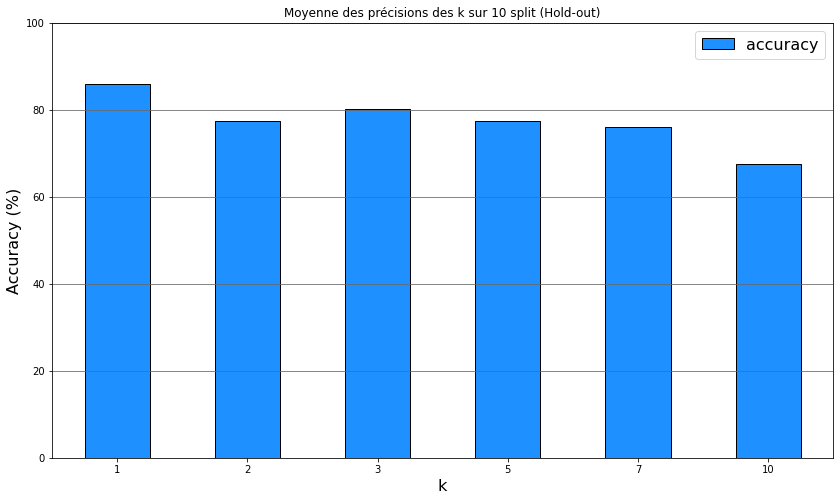

In [14]:
total_std = [[] for k in ks]
results = [ks]
#Génération de la liste de X splits
for i in range(10):
    accuracies = []
    print("Validation hold-out n° :", i + 1)

    #Entrainement
    train, test = train_test_split(wine_df.values.tolist())
    
    #Calculer les accuracies
    for index, accuracy in enumerate(calculate_accuracy(train, test, [wines[0] for wines in test], ks)):
        accuracies.append(accuracy)
    #calcul du pourcentage
    percent = sum(accuracies) / len(accuracies)

    #Ajout des données accuracies à la liste final
    results.append(accuracies)
    #Print des valeurs selon les données K 
    for index, accuracy in enumerate(accuracies):
        print("k = ", ks[index], ":", round(accuracy, 2),"%")
        total_std[index].append(accuracy)
    print("Moyenne = ", round(percent, 2), "%")

#Génération du print des moyennes de K sur 10 splits
for i, j in enumerate(total_std):
    meanAllSplit = round(sum(total_std[i]) / len(j), 2)
    print("Moyenne de k = ",ks[i], " sur 10 split ", meanAllSplit,"%")

df = pd.DataFrame({"k":results[0], "accuracy":results[1]})
plot = df.plot.bar(x='k', y='accuracy', rot=0,  figsize=figsize, color=color, edgecolor=edge)
plt.grid(visible=True, axis="y", color="dimgray")
plot.set_title("Moyenne des précisions des k sur 10 split (Hold-out)")
plot.set_xlabel("k", fontsize=fontsize)
plot.set_ylabel("Accuracy (%)", fontsize=fontsize)
plot.set_ylim([0,100])
plot.legend(prop={"size": fontsize})

#### 3.2) conclusions

Nous constatons que K1 et K3 nous donnent les meilleurs résultats, mais globalement inférieurs que lors d'une falidation sur les même données test/entrainement. Cela est normal, car à l'étape précédente, nous étions en over-fitting

### 3.3) Cross-validation avec 5 folds

Validation fold n° : 1
k =  1 : 94.29 %
k =  2 : 91.43 %
k =  3 : 94.29 %
k =  5 : 91.43 %
k =  7 : 88.57 %
k =  10 : 88.57 %
Moyenne =  91.43 %
Validation fold n° : 2
k =  1 : 91.43 %
k =  2 : 91.43 %
k =  3 : 91.43 %
k =  5 : 88.57 %
k =  7 : 85.71 %
k =  10 : 80.0 %
Moyenne =  88.1 %
Validation fold n° : 3
k =  1 : 85.71 %
k =  2 : 80.0 %
k =  3 : 85.71 %
k =  5 : 82.86 %
k =  7 : 85.71 %
k =  10 : 82.86 %
Moyenne =  83.81 %
Validation fold n° : 4
k =  1 : 91.43 %
k =  2 : 71.43 %
k =  3 : 88.57 %
k =  5 : 85.71 %
k =  7 : 77.14 %
k =  10 : 68.57 %
Moyenne =  80.48 %
Validation fold n° : 5
k =  1 : 80.0 %
k =  2 : 80.0 %
k =  3 : 80.0 %
k =  5 : 80.0 %
k =  7 : 74.29 %
k =  10 : 77.14 %
Moyenne =  78.57 %
Moyenne de précision avec k = 1 : 88.57 %
Moyenne de précision avec k = 2 : 82.86 %
Moyenne de précision avec k = 3 : 88.0 %
Moyenne de précision avec k = 5 : 85.71 %
Moyenne de précision avec k = 7 : 82.29 %
Moyenne de précision avec k = 10 : 79.43 %


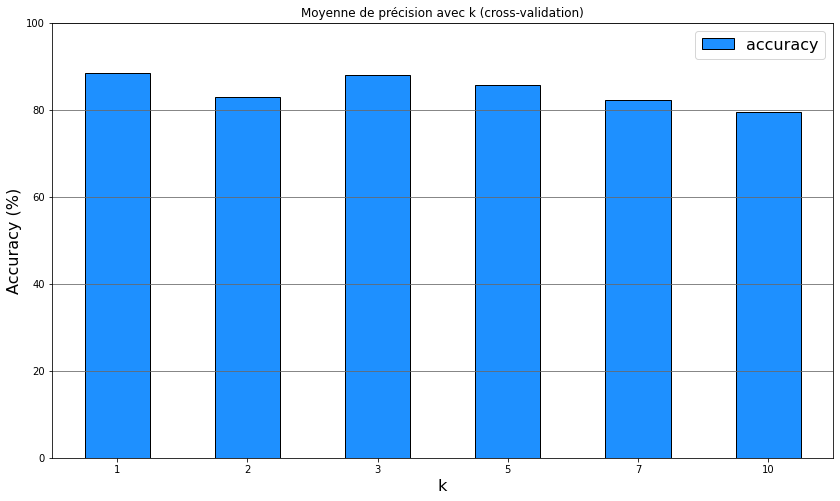

In [15]:
total = [[] for k in ks]
results = [ks, []]
folds = cross_validation_split(wine_df.values.tolist(), 5)
for i in range(len(folds)):
    accuracies = []
    print("Validation fold n° :", i+1)
    train = [item for sublist in [array for index, array in enumerate(folds) if index!=i] for item in sublist]
    test = folds[i]
    #Calculer les accuracies
    for index, accuracy in enumerate(calculate_accuracy(train, test, [x[0] for x in test], ks)):
        accuracies.append(accuracy)
    #calcul du pourcentage
    percent = sum(accuracies) / len(accuracies)

    for index, accuracy in enumerate(accuracies):
        print("k = ", ks[index], ":", round(accuracy, 2), "%")
        total[index].append(accuracy)
    print("Moyenne = ", round(percent, 2), "%")

for index, k in enumerate(total):
    std = sum(total[index])/len(k)
    print("Moyenne de précision avec k = {} : {} %".format(ks[index], round(std, 2)))
    results[1].append(std)

df = pd.DataFrame({"k":results[0], "accuracy":results[1]})
plot = df.plot.bar(x='k', y='accuracy', rot=0,  figsize=figsize, color=color, edgecolor=edge)
plt.grid(visible=True, axis="y", color="dimgray")
plot.set_title("Moyenne de précision avec k (cross-validation)")
plot.set_xlabel("k", fontsize=fontsize)
plot.set_ylabel("Accuracy (%)", fontsize=fontsize)
plot.set_ylim([0,100])
plot.legend(prop={"size": fontsize})

#### 3.3) Conclusions

Comme précédemment, K1 et K3 nous donnent les meilleurs résultat, cependant, globalement avec 5 folds, nous obtenons des meilleurs résultats pour tous les K que lors de la validation hold-out 10x

## Exercice 4 Evaluation des modèles

Utilisez la bibliothèque scikit-learn (sklearn.metrics) pour calculer la matrice de confusion du meilleur modèle trouvé précédemment (c.a.d., pour un K donné), sur l’ensemble de validation pour chaque « fold » de la validation croisée. Y a-t-il des classes pour lesquelles nous avons plus de peine à faire la bonne classification ?

In [16]:
#Matrice de confusion
def accuracyFromMatrix(m):
    tp = m[0][0]
    tn = m[1][1]
    fp = m[1][0]
    fn = m[0][1]
    accuracy = ((tp + tn) / (tp + tn + fp + fn)) * 100
    return accuracy

def concatMatrixClass(m):
    mClass=[]
    mClass.append(np.array([[m[0][0], m[0][1] + m[0][2]], [m[1][0] + m[2][0], m[1][1] + m[1][2] + m[2][1] + m[2][2]]]))
    mClass.append(np.array([[m[1][1], m[1][0] + m[1][2]], [m[0][1] + m[2][1], m[0][0] + m[0][2] + m[2][0] + m[2][2]]]))
    mClass.append(np.array([[m[2][2], m[2][0] + m[2][1]], [m[0][2] + m[1][2], m[0][0] + m[0][1] + m[1][0] + m[1][1]]]))
    return mClass

def printMatrix(matrix):
    print("True positive: ", matrix[0][0])
    print("True negative: ", matrix[1][1])
    print("False positive: ", matrix[1][0])
    print("False negative: ", matrix[0][1])
    
def printConfusionMatrix(confusionMatrix):
    for j in range(3):
        classes = ["0", "1"]
        fig, ax = plot_confusion_matrix(conf_mat = confusionMatrix[j],
                                           class_names = classes,
                                           show_absolute = True,
                                           show_normed = True,
                                           colorbar = True,
                                           cmap="Blues")
        ax.set_title("Matrice de confusion classe {}".format(j+1))
        fig.autofmt_xdate(rotation = 0)
        plt.show()

### 4.1)  Matrices de confusion avec cross-validation k = 1

-------------------Fold=1----------------


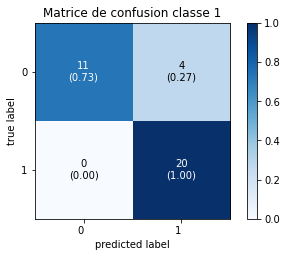

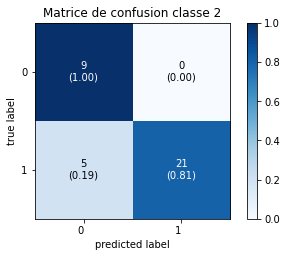

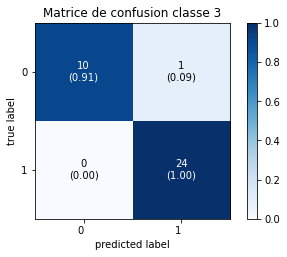

-------------------Fold=2----------------


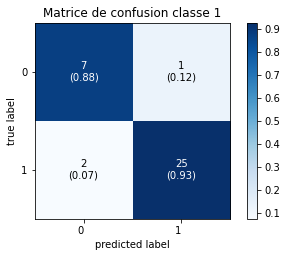

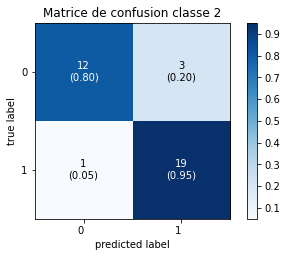

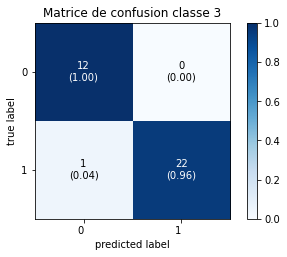

-------------------Fold=3----------------


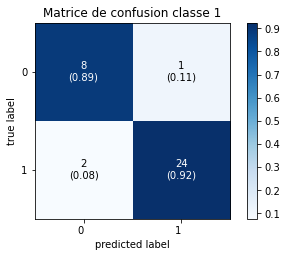

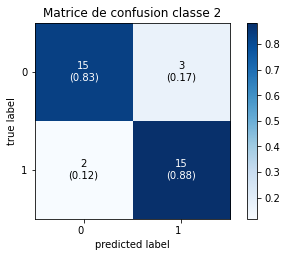

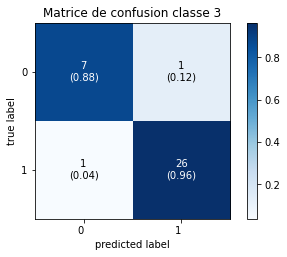

-------------------Fold=4----------------


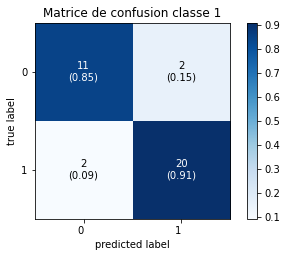

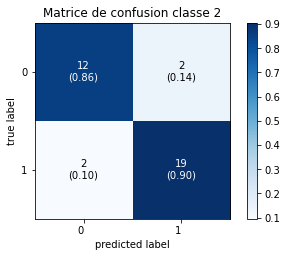

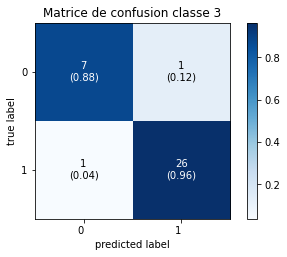

-------------------Fold=5----------------


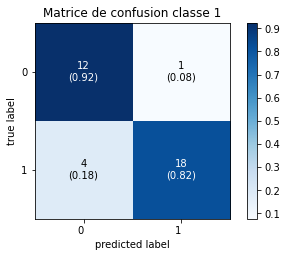

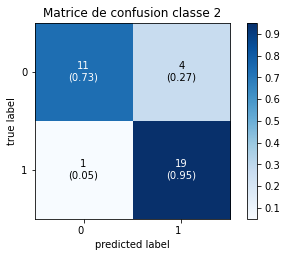

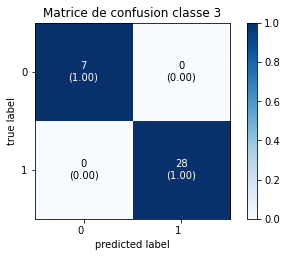

In [17]:
from sklearn.metrics import confusion_matrix
accuracies = []
currentClass = []
folds = cross_validation_split(wine_df.values.tolist(), 5)
for i in range(len(folds)):
    train = [item for sublist in [array for index, array in enumerate(folds) if index!=i] for item in sublist]
    test = folds[i]
    print("-------------------Fold={}----------------".format(i+1))
    y_true = [wines[0] for wines in test]
    y_pred = []
    for index, wine in enumerate(test):
        y_pred.append(predict_classification(train, test[index], 1))
    matrix = confusion_matrix(y_true, y_pred, labels = lab)
    matrixClass = concatMatrixClass(matrix)
    printConfusionMatrix(matrixClass)
    for j in range(3):
        currentClass.append(j + 1)
        accuracies.append(round(accuracyFromMatrix(matrixClass[j]), 2))
        
df = pd.DataFrame({"accuracy":accuracies, "class":currentClass})
df.sort_values(by=["class"], inplace=True)

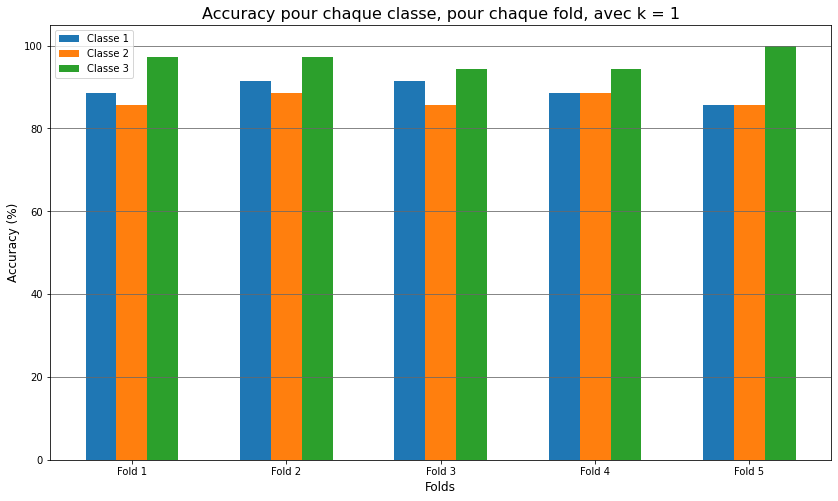

In [18]:
# Barplot pour comparer les accuracies des 3 classe pour tous les folds
labels = ["Fold 1", "Fold 2", "Fold 3", "Fold 4", "Fold 5"]
c1 = list(df[df["class"] == 1]["accuracy"])
c2 = list(df[df["class"] == 2]["accuracy"])
c3 = list(df[df["class"] == 3]["accuracy"])

x = np.arange(len(labels))
width = 0.2

plt.figure(figsize=figsize)
plt.bar(x-0.2, c1, width, color='tab:blue')
plt.bar(x, c2, width, color='tab:orange')
plt.bar(x+0.2, c3, width, color='tab:green')
plt.xticks(x, labels)
plt.xlabel("Folds", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.legend(["Classe 1", "Classe 2", "Classe 3"])
plt.title("Accuracy pour chaque classe, pour chaque fold, avec k = 1", fontsize=fontsize)
plt.grid(visible=True, axis="y", color="dimgray")
plt.show()

#### 4.1) Conclusions

Nous constations que pour la classe 3, la classification est en générale meilleure que pour les classes 1 et 2

## Exercice 5 : L’algorithme LVQ

#### Fonctions pour LVQ

In [19]:
#algorithm LVQ functions
from math import sqrt
from random import randrange
from random import seed
from random import shuffle
# calculate the Euclidean distance between two vectors
def LVQ_euclidean_distance(row1, row2):
    distance = 0    
    for i in range(1, len(row1)):
        distance += (row1[i-1]-row2[i])**2
    return sqrt(distance)

# Locate the best matching unit
def get_best_matching_unit(codebook, test_row):
    distances = list()
    for codevector in codebook:
        dist = LVQ_euclidean_distance(codevector, test_row)
        distances.append((codevector, dist))
    distances.sort(key=lambda tup: tup[1])
    
    return distances[0][0]

# Create a random codebook vector
def init_codevector(train,category):
    n_records = len(train)
    n_features = len(train[0])
    found = False
    while(not found):
        random_observation = randrange(n_records)
        if (train[random_observation][0] == category):
            found = True
    codevector = [train[random_observation][i] for i in range(1,n_features)]
    codevector.append(category)
    return codevector

# Train a set of codebook vectors
def train_codebook(train, n_codevectors, lrate, epochs):
    codebook = [init_codevector(train, i) for i in range(1, n_codevectors + 1)]
    for epoch in range(epochs):
        rate = lrate * (1.0-(epoch/float(epochs)))
        sum_error = 0.0
        shuffle(train)
        for row in train:
            bmu = get_best_matching_unit(codebook, row)
            for i in range(1, len(row)):
                error = row[i] - bmu[i-1]
                sum_error += error**2
                if bmu[-1] == row[0]:
                    bmu[i-1] += rate * error
                else:
                    bmu[i-1] -= rate * error
    return codebook

#------------------------------------------Our LVQ functions
#Avoiding overflow errors
def normalizeDataset(labels, df):
    for label in labels:
        if (label != "Class"):
            val_min = np.min(df[label])
            val_max = np.max(df[label])
            df[label] = (df[label] - val_min)/(val_max - val_min)
    return df

#Fais une prédiction par rapport à un codebook entrainé
def prediction(codebook, new_data):
    codevecteurs = [get_best_matching_unit(codebook, row) for row in new_data]
    return [codevecteur[-1] for codevecteur in codevecteurs]

#Algorithme LVQ
def LVQ(learnRate, epochs, codevectors, folds, df):
    labels = list(df)
    dfCopy = df.copy()
    dfNormalized = normalizeDataset(labels, dfCopy)
    folds = cross_validation_split(dfNormalized.values.tolist(), folds)
    trainedCb = []
    predictions = []
    actuals = []
    for i in range(len(folds)):
        train = [item for sublist in [array for index, array in enumerate(folds) if index!=i] for item in sublist]
        test = folds[i]
        trainedCb = train_codebook(train, codevectors, learnRate, epochs)
        predictions.append(prediction(trainedCb, test))
        actuals.append([i[0] for i in test])
    return trainedCb, predictions, actuals

#Calcul de l'accuracy
def accuracy(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return (correct / len(actual) * 100)

### 5.1) Modification des hyper-paramètre pour déterminer le meilleur modèle

In [55]:
learningRate = 0.5
epochs = 25
codevectors = 3
folds = 5
lRatesRange = np.arange(0.1, 1.1, 0.2)
accuraciesVsLearningRate=[]
accuraciesVsCodevector=[]
accuraciesVsEpoch=[]

for lrate in lRatesRange:
    lrate = round(lrate, 2)
    codebook, predictions, actuals = LVQ(lrate, epochs, codevectors, folds, wine_df2)
    accuracies = []
    for i in range(len(predictions)):
        accuracies.append(accuracy(actuals[i], predictions[i]))
    accuraciesVsLearningRate.append(np.average(accuracies))

for codevector in range(1, 4):
    codebook, predictions, actuals = LVQ(learningRate, epochs, codevector, folds, wine_df2)
    accuracies = []
    for i in range(len(predictions)):
        accuracies.append(accuracy(actuals[i], predictions[i]))
    accuraciesVsCodevector.append(np.average(accuracies))

for epoch in range(epochs, 300, epochs):
    codebook, predictions, actuals = LVQ(learningRate, epoch, codevectors, folds, wine_df2)
    accuracies = []
    for i in range(len(predictions)):
        accuracies.append(accuracy(actuals[i], predictions[i]))
    accuraciesVsEpoch.append(np.average(accuracies))

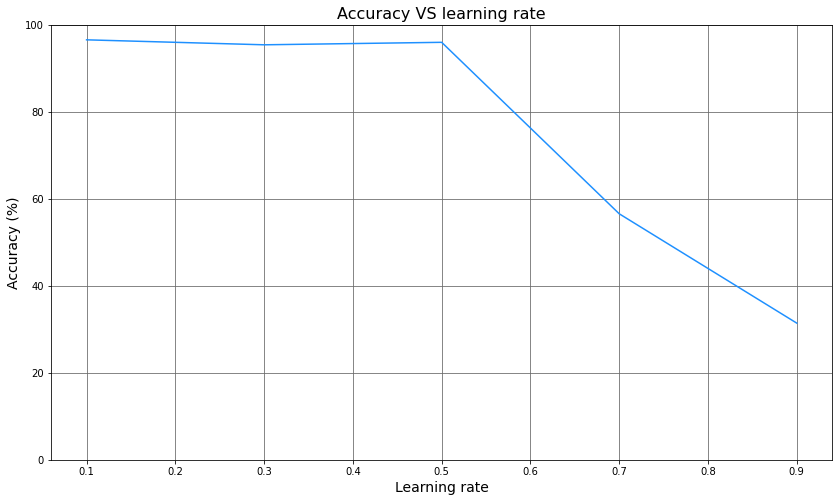

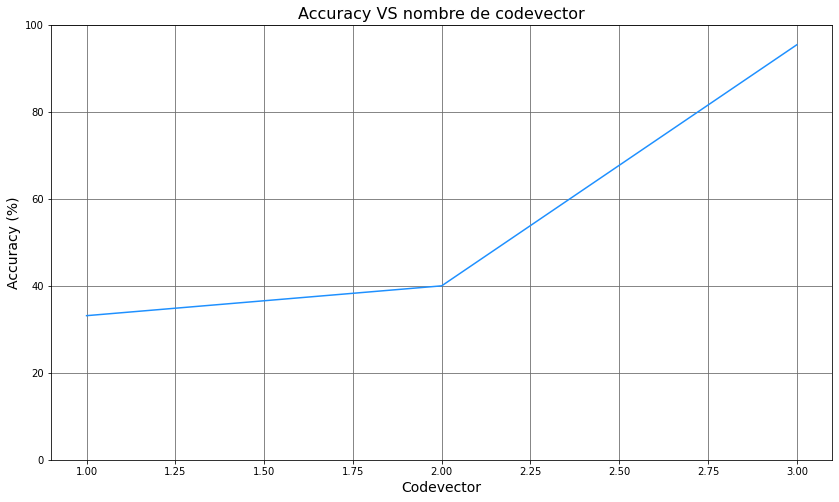

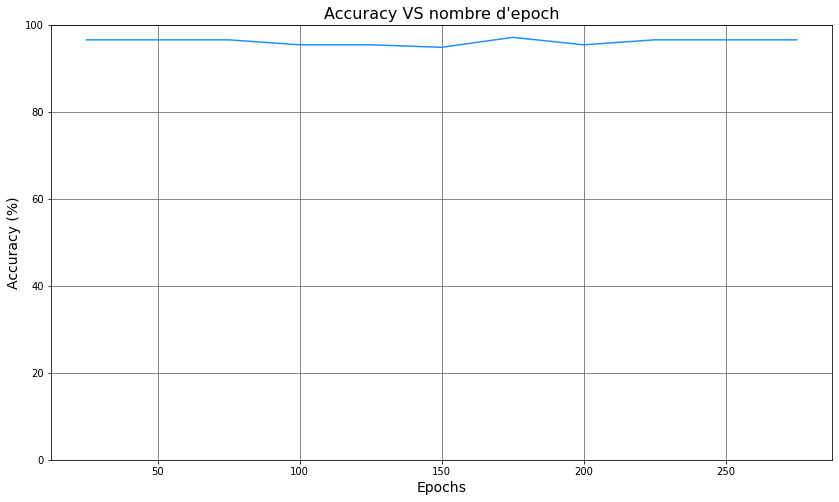

In [56]:
acc = "Accuracy (%)"
sizeLabels = fontsize - 2

plt.figure(figsize=figsize)
plt.plot(lRatesRange, accuraciesVsLearningRate, color=color)
plt.xlabel("Learning rate", fontsize=sizeLabels)
plt.ylabel(acc, fontsize=sizeLabels)
plt.ylim([0, 100])
plt.title("Accuracy VS learning rate", fontsize=fontsize)
plt.grid(visible=True, axis="both", color="dimgray")
plt.show()

plt.figure(figsize=figsize)
plt.plot(range(1, 4), accuraciesVsCodevector, color=color)
plt.xlabel("Codevector", fontsize=sizeLabels)
plt.ylabel(acc, fontsize=sizeLabels)
plt.ylim([0, 100])
plt.title("Accuracy VS nombre de codevector", fontsize=fontsize)
plt.grid(visible=True, axis="both", color="dimgray")
plt.show()

plt.figure(figsize=figsize)
plt.plot(range(25, 300, 25), accuraciesVsEpoch, color=color)
plt.xlabel("Epochs", fontsize=sizeLabels)
plt.ylabel(acc, fontsize=sizeLabels)
plt.ylim([0, 100])
plt.title("Accuracy VS nombre d'epoch", fontsize=fontsize)
plt.grid(visible=True, axis="both", color="dimgray")
plt.show()

#### 5.1) Conclusions

Pour les hyper-paramètres, nous remarquons que l'accuracy tend à baisser quand le learning rate augmente et quand le nombre de codevecors diminue. Concernant le nombre d'epoch, nous remarquons que l'accuracy est plus faible entre 100 et 150 (selon les run), cependant il fluctue beaucoup moins que les 2 autres paramètres

### 5.2) Matrice de confusion pour le meilleur modèle pour chaque folds

-------------------Fold = 1----------------


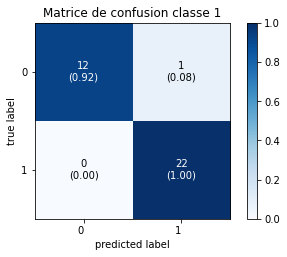

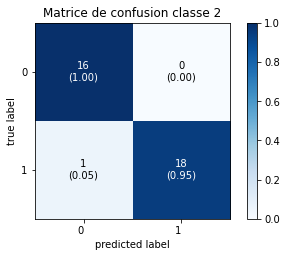

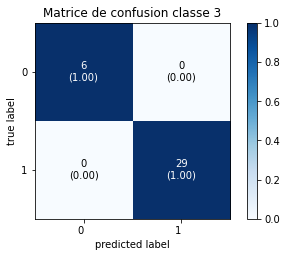

-------------------Fold = 2----------------


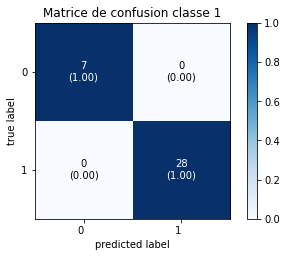

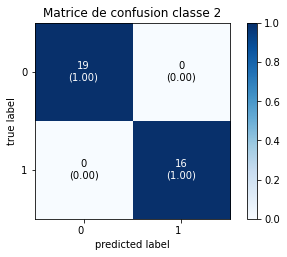

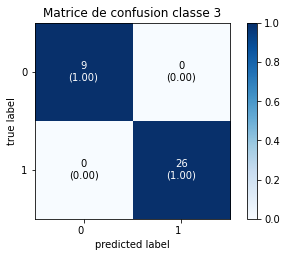

-------------------Fold = 3----------------


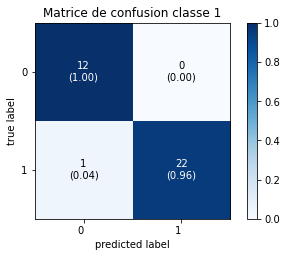

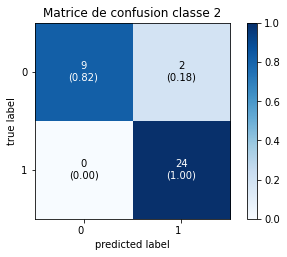

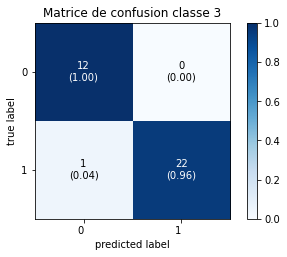

-------------------Fold = 4----------------


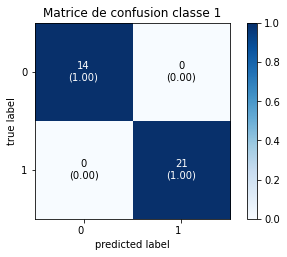

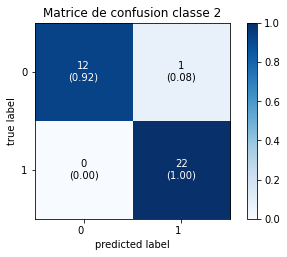

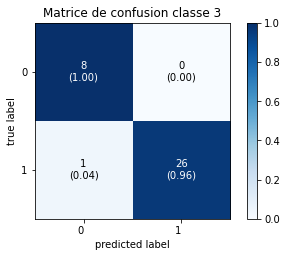

-------------------Fold = 5----------------


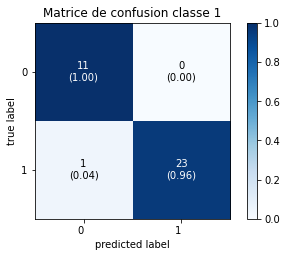

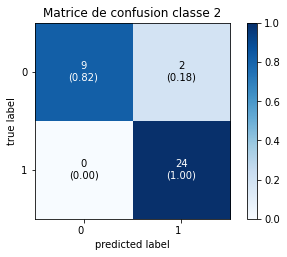

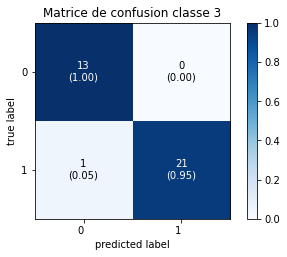

[97.14285714285714, 100.0, 94.28571428571428, 97.14285714285714, 94.28571428571428]


In [57]:
learningRate = 0.1
epochs = 175
codevectors = 3

codebook, predictions, actuals = LVQ(learningRate, epochs, codevectors, folds, wine_df2)
accuracies = []
for i in range(len(predictions)):
    accuracies.append(accuracy(actuals[i], predictions[i]))
    matrix = confusion_matrix(actuals[i], predictions[i], labels = lab)
    matrixClass = concatMatrixClass(matrix)
    currentClass.append(i + 1)
    foldRange.append(i+ 1)
    print("-------------------Fold = {}----------------".format(i+1))
    printConfusionMatrix(matrixClass)
print(accuracies)

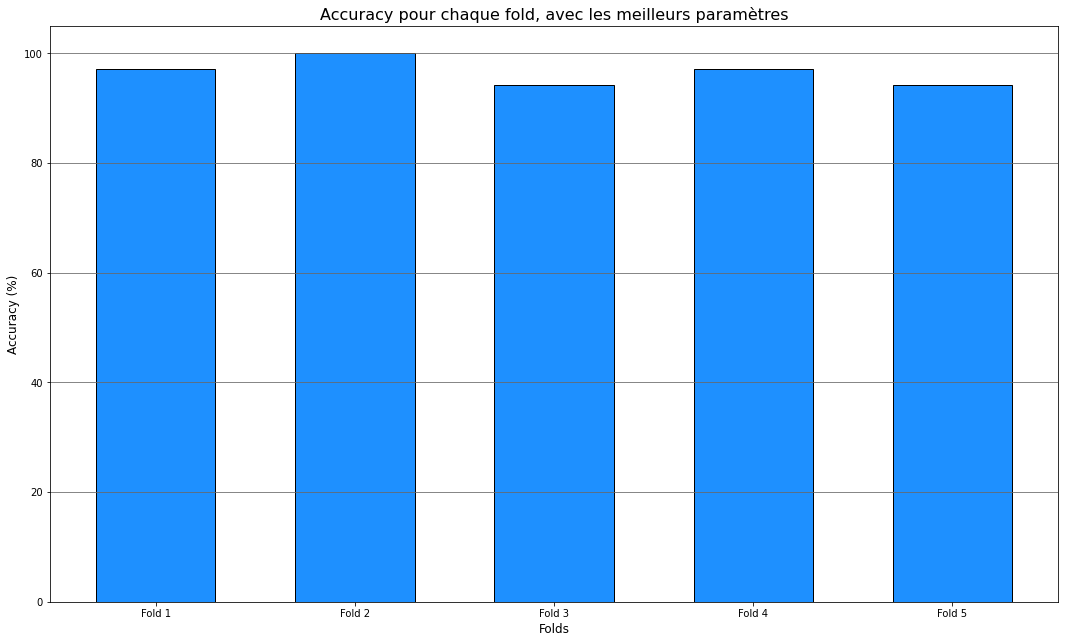

In [58]:
# Barplot pour comparer les accuracies des 3 classe pour tous les folds
labels = ["Fold 1", "Fold 2", "Fold 3", "Fold 4", "Fold 5"]
fig = plt.figure(figsize=figsize)
ax = fig.add_axes([0,0,1,1])
ax.bar(labels, accuracies, 0.6, color=color, edgecolor=edge)
plt.xlabel("Folds", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.grid(visible=True, axis="y", color="dimgray")
plt.title("Accuracy pour chaque fold, avec les meilleurs paramètres", fontsize=fontsize)
plt.show()





#### 5.2) Conclusions

Nous observons qu'avec les paramètres: learningRate = 0.1, epochs = 175 et codevectors = 3, notre classification avec LVQ est très performante par rapport à celle de k-NN, car nous arrivons à des accuracies entre 94 et 100%. Cependant LVQ est relativement lent à exécuter. Pour certaine gosses base de données à classifier, cet algorithme pourrait être trop lourd.

## Conclusion générale

Nous avons eu l'occasion d'utiliser 3 méthodes pour la calssification des vins:
1) Analyse exploratoire
2) k-NN
3) LVQ

Nous remarquons que LVQ est beaucoup plus accurate que k-NN, qui lui-même l'est plus que lors d'une classification à la main. Cependant, selon nous l'analyse exploratoire reste nécessaire, peu importe l'algorithme de classification utilisé, car elle nous permet de nous familiariser avec les données.

Nous avons aussi remarqué que LVQ est beaucoup plus gourmand en performance machine que k-NN, ce qui pourrait poser problème selon la taille des bases de données à analyser.

Pour k-NN nous avons remarqué que la meilleure méthode de séparation des données de test et d'entrainement est la Cross-validation avec n folds (dans notre cas 5)